In [3]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import torch 
import os
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from sklearn.model_selection import train_test_split


%matplotlib inline
%config InlineBackend.figure_format='retina'
 
sns.set(style='whitegrid', palette='muted', font_scale=1.2) 
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"] 
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE)) 
rcParams['figure.figsize'] = 14, 6
register_matplotlib_converters()
 
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [4]:
#df = pd.read_csv('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/combine_nuts1_period_Berlin.csv')
df = pd.read_csv('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/data/Delhi_Climate/DailyDelhiClimateTrain.csv')

#print(df, df.shape)
df_new = df.rename(columns={'Unnamed: 0': 'true index'})
print(df_new)

            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]


In [5]:
print('original column:', df_new.columns)
#delete true index
# del df_new['true index', 'NUTS1']
#df_new= df_new['date'].values.astype(float)
#delete the real index

# df_new = df_new.drop('true index', axis=1)
# df_new = df_new.drop('NUTS1', axis=1)
df_new = df_new.drop('date', axis=1)

print(df_new)       #true df_new

original column: Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')
       meantemp    humidity  wind_speed  meanpressure
0     10.000000   84.500000    0.000000   1015.666667
1      7.400000   92.000000    2.980000   1017.800000
2      7.166667   87.000000    4.633333   1018.666667
3      8.666667   71.333333    1.233333   1017.166667
4      6.000000   86.833333    3.700000   1016.500000
...         ...         ...         ...           ...
1457  17.217391   68.043478    3.547826   1015.565217
1458  15.238095   87.857143    6.000000   1016.904762
1459  14.095238   89.666667    6.266667   1017.904762
1460  15.052632   87.000000    7.325000   1016.100000
1461  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 4 columns]


In [6]:
################ import test.csv and drop unuseful date columm ################

df_test = pd.read_csv('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/data/Delhi_Climate/DailyDelhiClimateTest.csv')
df_test_new = df_test.rename(columns={'Unnamed: 0': 'true index'})
#print(df_test_new)
print('original column:', df_test_new.columns)
df_test_new = df_test_new.drop('date', axis=1)
print(df_test_new) 

original column: Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')
      meantemp   humidity  wind_speed  meanpressure
0    15.913043  85.869565    2.743478     59.000000
1    18.500000  77.222222    2.894444   1018.277778
2    17.111111  81.888889    4.016667   1018.333333
3    18.700000  70.050000    4.545000   1015.700000
4    18.388889  74.944444    3.300000   1014.333333
..         ...        ...         ...           ...
109  34.500000  27.500000    5.562500    998.625000
110  34.250000  39.375000    6.962500    999.875000
111  32.900000  40.900000    8.890000   1001.600000
112  32.875000  27.500000    9.962500   1002.125000
113  32.000000  27.142857   12.157143   1004.142857

[114 rows x 4 columns]


['meantemp', 'humidity', 'wind_speed', 'meanpressure']


<Figure size 1000x600 with 0 Axes>

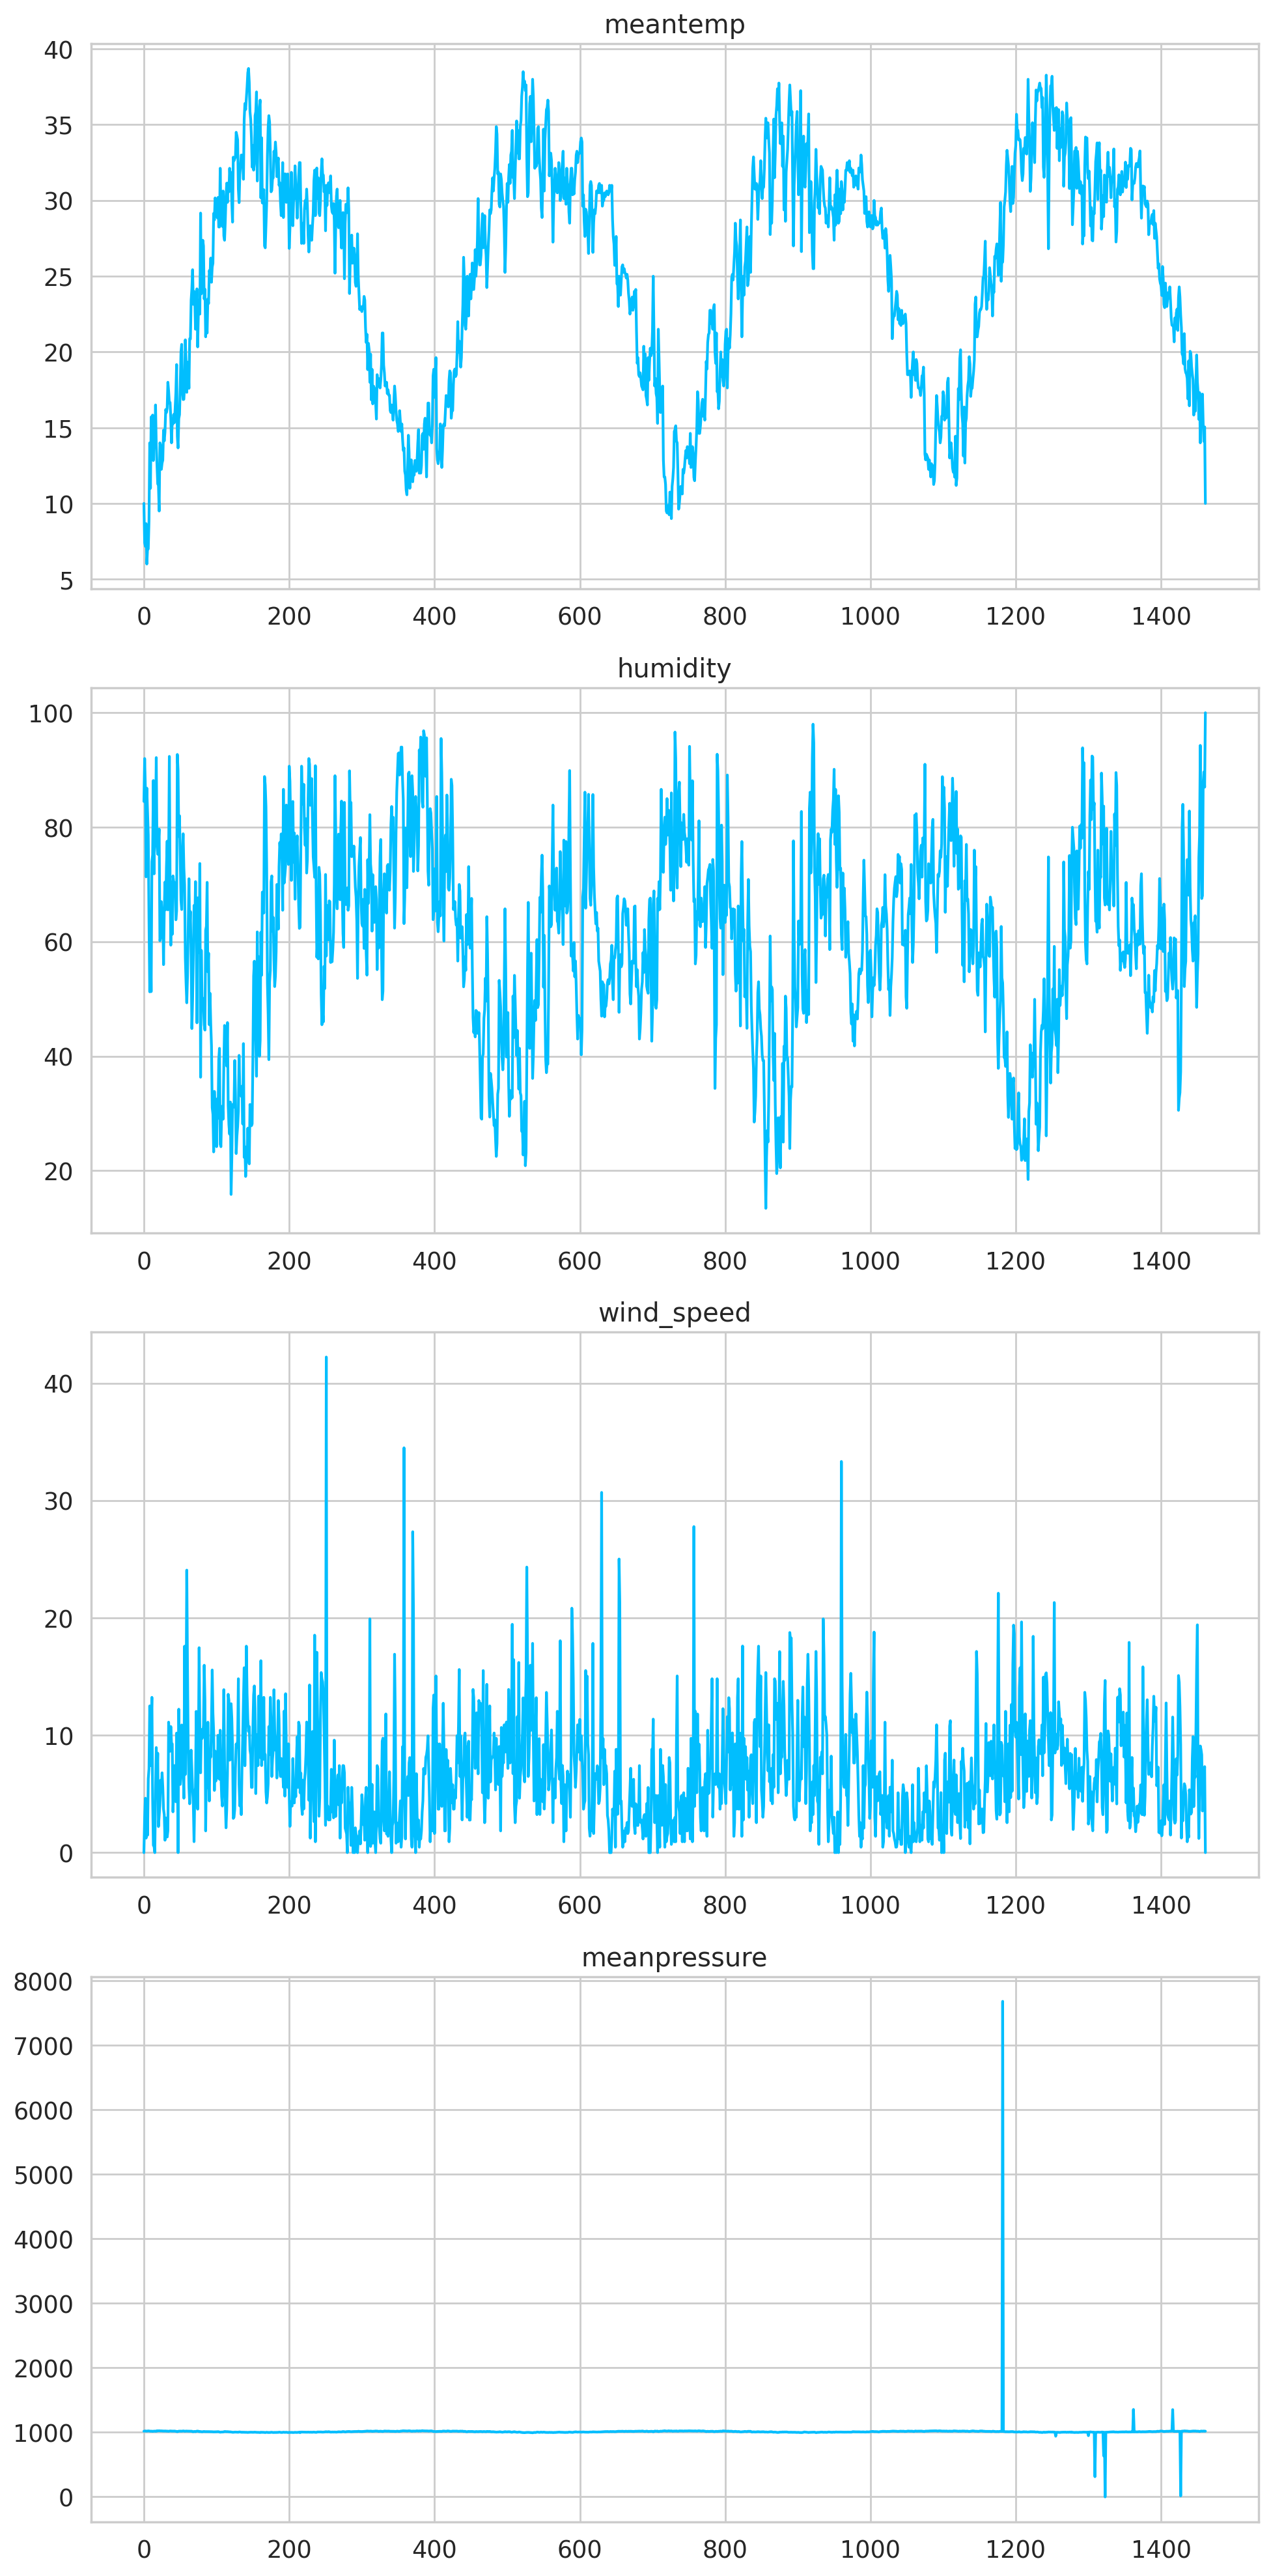

In [7]:
############################### view the train--validation data in plots #############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 可视化
plt.figure(figsize=(10, 6))
#sns.boxplot(data= df_new)
print(list(df_new.columns))

# Number of rows and columns for the subplots
n_rows = 4
n_cols = 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 20))

# Loop through the columns and create a plot for each one
for i, col in enumerate(df_new.columns):
    axes[i].plot(df[col])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
# ######################## concat the train, validation and test dataframe together ###########################

print('df_new:', df_new.shape, len(df_new))
print('df_test_new:',  df_test_new.shape)

# df_concat_result = pd.concat([df_new, df_test_new], axis=0)
# print(df_concat_result.shape)

df_new: (1462, 4) 1462
df_test_new: (114, 4)


In [9]:
def modfy(inputs, sequence_length, which_columm):  ################# inputs: dataframe; sequence_length: step size; which used columm used as label #########################

                                # use 14 previous days to predict the next one
    df_numpy= inputs.values     #change DataFrame to Numpy 
    #scaler= StandardScaler()
    scaler= MinMaxScaler()      #set values up between 0 and 1

    df_numpy= scaler.fit_transform(df_numpy)
    print(df_numpy.shape)

    X, Y = [], []
    for i in range(len(df_numpy) - sequence_length):
        X.append(df_numpy[i:i+sequence_length])
        Y.append(df_numpy[i+sequence_length, which_columm])  # Predicting column"A"

    X = torch.tensor(X, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.float32)

    print('X, Y:', X.shape, Y.shape)
    return X, Y

In [10]:
######################## modfy train data from 2d to 3d ######################
X, Y= modfy(df_new, 14, 0)

(1462, 4)
X, Y: torch.Size([1448, 14, 4]) torch.Size([1448])


/tmp/ipykernel_2516825/3580347308.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  X = torch.tensor(X, dtype=torch.float32)


In [11]:
################### split data for training and validation ###################################

X_train, X_val, y_train, y_val = train_test_split(X[:(1462- 28+ 1)], Y[: (1462- 28+ 1)], test_size=0.2, random_state=42)
print('X_train, X_valid, y_train, y_valid:', X_train.shape, X_val.shape, y_train.shape, y_val.shape)

X_train, X_valid, y_train, y_valid: torch.Size([1148, 14, 4]) torch.Size([287, 14, 4]) torch.Size([1148]) torch.Size([287])


In [12]:
################## modfy test data ############################

X_test, y_test= modfy(df_test_new, 14, 0)
print('X_test, y_test:', X_test.shape, y_test.shape)

(114, 4)
X, Y: torch.Size([100, 14, 4]) torch.Size([100])
X_test, y_test: torch.Size([100, 14, 4]) torch.Size([100])


In [13]:
################# Model Structure #####################
################# Var Model ###########################
import torch.nn as nn

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

class TimeSeriesLSTM_add_Var(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(TimeSeriesLSTM_add_Var, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value (column "A")

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.batch_norm(out[:, -1, :])
        out = self.dropout(out)
        out = self.fc(out)
        return out

    # def evaluate_and_compute_variance(self, x):
        
    #     device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
    #     self.to(device)

    #     #self.eval()  # Set the model to evaluation mode
    #     #self.train()  # Set the model to train mode
    #     tensors_list = []

    #     num_iterations= 100
    #     for i in range(num_iterations):
    #         # out, _ = self.lstm(x)
    #         # out = self.batch_norm(out[:, -1, :])
    #         # out = self.dropout(out)
    #         # out = self.fc(out)

    #         outputs = self(x.to(device))
    #         # criterion = nn.MSELoss()
    #         # loss = criterion(outputs.squeeze(), y_val.to(device))
    #         # print(f"Loss at iteration {i}: {loss.item()}")
    #         tensors_list.append(outputs)

    #     # Stack the tensors to create a 3D tensor of size (num_iterations, 131, 1)
    #     stacked_tensors = torch.stack(tensors_list, dim=0)

    #     # Compute the variance along the first dimension
    #     variances = torch.var(stacked_tensors, dim=0, unbiased=False)

    #     variances_2d = variances.reshape(287, 1)
    #     return variances_2d
    
#model = TimeSeriesLSTM(input_dim=7, hidden_dim=50, num_layers=2, dropout_prob=0.3)
var_model = TimeSeriesLSTM_add_Var(input_dim= 4, hidden_dim= 32, num_layers= 3, dropout_prob=0.3).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(var_model.parameters(), lr=0.001)

print(var_model)
    
# # Assuming X_val and Y_val are your validation data tensors

# ############# have a try ##############################
# variances_2d = var_model.evaluate_and_compute_variance(X_val)
# print('variances_2d:', variances_2d.size())
# print(variances_2d)

TimeSeriesLSTM_add_Var(
  (lstm): LSTM(4, 32, num_layers=3, batch_first=True)
  (batch_norm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


############################ Training ###########################

Epoch [10/200], Training Loss: 0.1992, Validation Loss: 0.2246
Epoch [20/200], Training Loss: 0.1577, Validation Loss: 0.1862
Epoch [30/200], Training Loss: 0.1249, Validation Loss: 0.1542
Epoch [40/200], Training Loss: 0.0995, Validation Loss: 0.1313
Epoch [50/200], Training Loss: 0.0755, Validation Loss: 0.1043
Epoch [60/200], Training Loss: 0.0522, Validation Loss: 0.0819
Epoch [70/200], Training Loss: 0.0354, Validation Loss: 0.0615
Epoch [80/200], Training Loss: 0.0215, Validation Loss: 0.0432
Epoch [90/200], Training Loss: 0.0128, Validation Loss: 0.0269
Epoch [100/200], Training Loss: 0.0082, Validation Loss: 0.0134
Epoch [110/200], Training Loss: 0.0068, Validation Loss: 0.0091
Epoch [120/200], Training Loss: 0.0065, Validation Loss: 0.0126
Epoch [130/200], Training Loss: 0.0062, Validation Loss: 0.0140
Epoch [140/200], Training Loss: 0.0061, Validation Loss: 0.0213
Epoch [150/200], Training Loss: 0.0061, Validation Loss: 0.0405
Epoch [160/200], Training Loss: 0.0058, Validatio

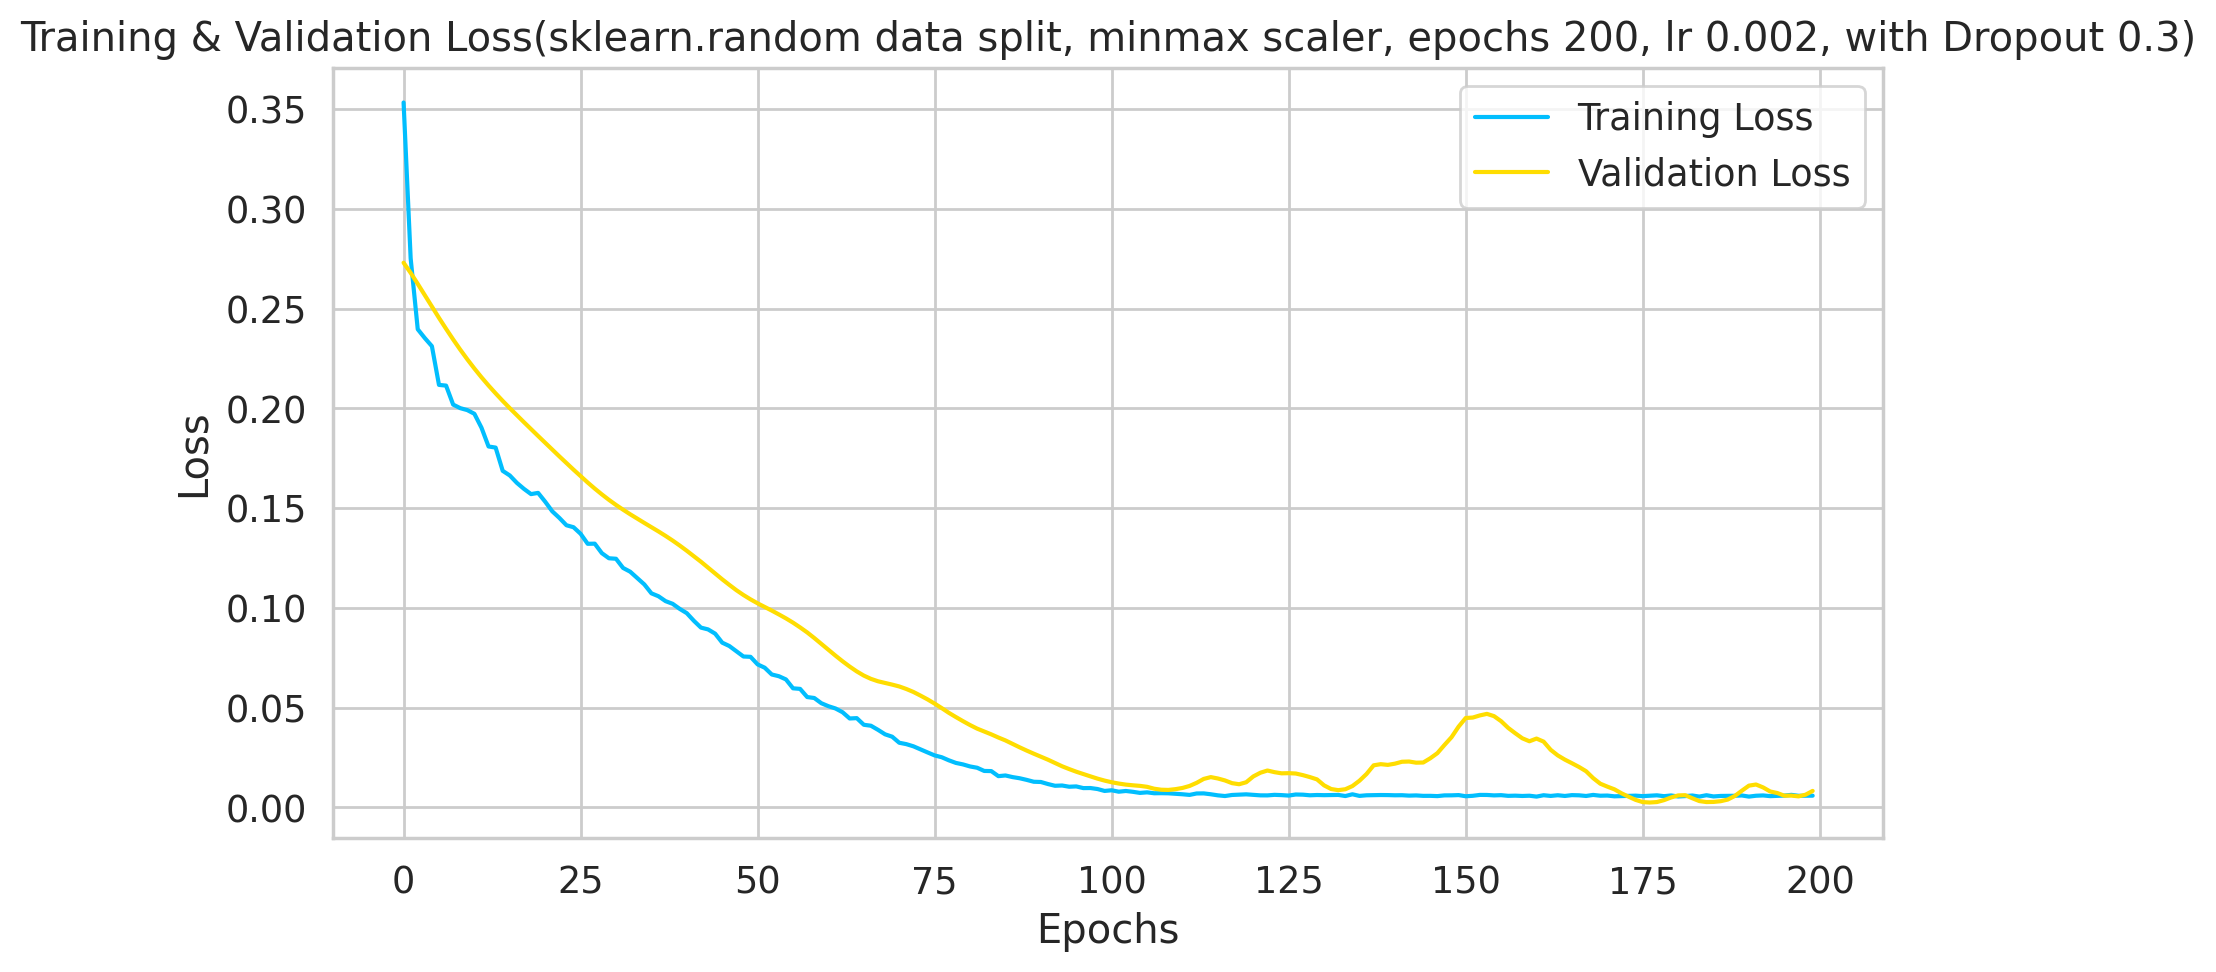

In [14]:
############################ random data split, minmax scaler, hidden_dim= 32, epochs 130, with Dropout 0.3, lr 0.001 #######################
epochs = 200
lr = 0.002
droprate= 0.3

train_losses = []
val_losses = []


for epoch in range(epochs):
    var_model.train()
    optimizer.zero_grad()

    outputs = var_model(X_train.to(device))
    loss = criterion(outputs.squeeze(), y_train.to(device))
    
    loss.backward()
    optimizer.step()
    
    # Validate the model
    var_model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = var_model(X_val.to(device))
        val_loss = criterion(val_outputs.squeeze(), y_val.to(device))
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Training & Validation Loss(sklearn.random data split, minmax scaler, epochs {epochs}, lr {lr}, with Dropout {droprate})')
plt.legend()
plt.grid(True)
plt.show()

######################## Model save and load ###################################


In [15]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")  
#套用模型，预测输出
loaded_model = TimeSeriesLSTM_add_Var(input_dim= 4, hidden_dim= 32, num_layers= 3, dropout_prob=0.3).to(device)
model_weight_path = os.path.abspath(os.path.join(os.getcwd(),"/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/LSTM_weather_state_dict_14.pth"))
loaded_model.load_state_dict(torch.load(model_weight_path))

<All keys matched successfully>

In [16]:
print(loaded_model)

TimeSeriesLSTM_add_Var(
  (lstm): LSTM(4, 32, num_layers=3, batch_first=True)
  (batch_norm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


Inherit and creat a new LSTM Model

In [20]:
class TimeSeriesLSTM_add_Var_New(TimeSeriesLSTM_add_Var):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(TimeSeriesLSTM_add_Var_New, self).__init__(input_dim, hidden_dim, num_layers, dropout_prob)

    def forward(self, x):
        # Call the original forward pass from the inherited model
        #out = super().forward(x)
        #self.eval()  # Set the model to evaluation mode
        self.train()  # Set the model to train mode
        # Add your new function here:
        tensors_list = []
        num_iterations= 100

        for i in range(num_iterations):
            
            out = super().forward(x)
            #outputs = self(out.to(device))
            tensors_list.append(out)
        
        print('len(tensors_list);', len(tensors_list))
        # Stack the tensors to create a 3D tensor of size 
        stacked_tensors = torch.stack(tensors_list, dim=0)
        print('stacked_tensors:', stacked_tensors.shape)

        # Compute the variance along the first dimension
        variances = torch.var(stacked_tensors, dim=0, unbiased=False)
        print('variances.shape:', variances.shape)
        return variances

In [18]:
# class TimeSeriesLSTM_add_Var_New(TimeSeriesLSTM_add_Var):
#     def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
#         super(TimeSeriesLSTM_add_Var_New, self).__init__(input_dim, hidden_dim, num_layers, dropout_prob)

#     def forward(self, x):
#         # 调用继承自父类的原始前向传播
#         out = super().forward(x)

#         # 在此处添加您的新功能:
#         tensors_list = []
#         num_iterations = 100  # 根据需要调整迭代次数
#         for _ in range(num_iterations):
#             tensors_list.append(out)

#         # 将张量堆叠起来，形成一个大小为 [num_iterations, batch_size, hidden_dim] 的 3D 张量
#         stacked_tensors = torch.stack(tensors_list, dim=0)
#         print('len(tensors_list);', len(tensors_list))  # 可选，用于调试
#         print('stacked_tensors:', stacked_tensors.shape)  # 可选，用于调试

#         # 计算第一个维度上的方差
#         variances = torch.var(stacked_tensors, dim=0, unbiased=False)
#         print('variances.shape:', variances.shape)  # 可选，用于调试

#         return variances  # 返回方差

In [21]:
new_var_model= TimeSeriesLSTM_add_Var_New(input_dim= 4, hidden_dim= 32, num_layers= 3, dropout_prob=0.3).to(device)
print(new_var_model)
######################################## Test my modified LTSM Model ####################################
#X_test 
#y_test
print(X_val.shape)
X_val= X_val.to(device)
AAA= new_var_model(X_val)
print(AAA.shape)
print(AAA)

TimeSeriesLSTM_add_Var_New(
  (lstm): LSTM(4, 32, num_layers=3, batch_first=True)
  (batch_norm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
torch.Size([287, 14, 4])
len(tensors_list); 100
stacked_tensors: torch.Size([100, 287, 1])
variances.shape: torch.Size([287, 1])
torch.Size([287, 1])
tensor([[4.5126e-02],
        [1.8553e-02],
        [6.0663e-03],
        [6.9580e-03],
        [1.1433e-02],
        [9.4311e-04],
        [7.1513e-03],
        [6.7117e-03],
        [5.3399e-03],
        [1.7895e-02],
        [4.5143e-02],
        [1.7564e-02],
        [3.4127e-03],
        [4.3974e-02],
        [3.0739e-04],
        [1.2617e-02],
        [2.0918e-02],
        [1.3065e-02],
        [4.2112e-03],
        [2.4149e-02],
        [3.2102e-03],
        [2.0678e-02],
        [6.5987e-03],
        [1.8951e-02],
        [4.9017e-04],
        [1.4440e-03

In [22]:
# class TimeSeriesLSTM_add_Var_New(TimeSeriesLSTM_add_Var):
#     def __init__(self, trained_model, input_dim, hidden_dim, num_layers, dropout_prob):
#          super(TimeSeriesLSTM_add_Var_New, self).__init__(input_dim, hidden_dim, num_layers, dropout_prob)

#          self.trained_model = trained_model
#          self.trained_model.train()

#     def forward(self, x):
#          # Call the original forward pass from the inherited model
#          #out = super().forward(x)

#          # Add your new function here: out = out * 2.0

#          tensors_list = []
#          num_iterations= 100
#          for i in range(num_iterations):

#              out = self.trained_model(x)
#              tensors_list.append(out)

#          # Stack the tensors to create a 3D tensor of size 
#          stacked_tensors = torch.stack(tensors_list, dim=0)

#          # Compute the variance along the first dimension
#          variances = torch.var(stacked_tensors, dim=0, unbiased=False)

#          variances_2d = variances.reshape(100, 1)
#          return variances_2d
#          #return out

In [23]:
# new_var_model= TimeSeriesLSTM_add_Var_New(loaded_model, input_dim= 4, hidden_dim= 32, num_layers= 3, dropout_prob=0.3).to(device)
# print(new_var_model)
# BBB= new_var_model(X_val)
# print(BBB.shape)
# print(BBB)

Verify #####################################

In [24]:
##################################### Validation #############################
print(X_val.size(), y_val.size(), '\n')
X_val = X_val.to(device)
y_val = y_val.to(device)
loaded_model = loaded_model.to(device)

loaded_model.train()
#loaded_model.eval()
tensors_list= []
print('begin 100 loops:')
for i in range(100):
    
    outputs = loaded_model(X_val)
    print(outputs.size())
    print(outputs.squeeze().size())
    loss = criterion(outputs.squeeze(), y_val)
    print(f"Loss at iteration {i}: {loss.item()}")
    print()
    tensors_list.append(outputs)

# Stack the tensors to create a 3D tensor of size (100, 131, 1)
print()
stacked_tensors = torch.stack(tensors_list, dim=0)
print('stacked_tensors:', stacked_tensors.size())

# Compute the variance along the first dimension
variances = torch.var(stacked_tensors, dim=0, unbiased=False)
print('variances:', variances.size())
variances_2d = variances.reshape(y_val.size(), 1)
print('variances_2d:', variances_2d.size())

torch.Size([287, 14, 4]) torch.Size([287]) 

begin 100 loops:
torch.Size([287, 1])
torch.Size([287])
Loss at iteration 0: 0.007304173428565264

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 1: 0.007083860691636801

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 2: 0.007338931784033775

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 3: 0.006459552329033613

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 4: 0.008484983816742897

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 5: 0.006636796053498983

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 6: 0.0076671019196510315

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 7: 0.009430259466171265

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 8: 0.008879931643605232

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 9: 0.007604370824992657

torch.Size([287, 1])
torch.Size([287])
Loss at iteration 10: 0.008959745988249779

torch.Size([287, 1])
torch.Size([2

In [25]:
################################################### Test #######################################
print('X_test.size(), y_test.size():', X_test.size(), y_test.size(), '\n')
X_test = X_test.to(device)
y_test = y_test.to(device)
loaded_model = loaded_model.to(device)
print()

tensors_list_test= []
loaded_model.train()
#loaded_model.eval()
print('begin 100 loops:')
for i in range(100):

    outputs = loaded_model(X_test)
    print(outputs.size())
    print(outputs.squeeze().size())
    loss = criterion(outputs.squeeze(), y_test)
    print(f"Loss at iteration {i}: {loss.item()}")
    print()
    tensors_list_test.append(outputs)

# Stack the tensors to create a 3D tensor of size (100, 131, 1)
stacked_tensors = torch.stack(tensors_list_test, dim=0)

# Compute the variance along the first dimension
variances_test = torch.var(stacked_tensors, dim=0, unbiased=False)

variances_test_2d = variances_test.reshape(y_test.size(), 1)
print('variances_2d:', variances_test_2d.size())

X_test.size(), y_test.size(): torch.Size([100, 14, 4]) torch.Size([100]) 


begin 100 loops:
torch.Size([100, 1])
torch.Size([100])
Loss at iteration 0: 0.024509549140930176

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 1: 0.026642270386219025

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 2: 0.024036211892962456

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 3: 0.021576527506113052

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 4: 0.024112403392791748

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 5: 0.026118287816643715

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 6: 0.024127434939146042

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 7: 0.02719123288989067

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 8: 0.021678676828742027

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 9: 0.022340063005685806

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 10: 0.024506228044629097

torch

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 79: 0.023268215358257294

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 80: 0.025657009333372116

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 81: 0.023284820839762688

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 82: 0.026498014107346535

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 83: 0.022654417902231216

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 84: 0.023535098880529404

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 85: 0.02226131409406662

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 86: 0.026654476299881935

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 87: 0.022586269304156303

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 88: 0.02383209578692913

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 89: 0.024310283362865448

torch.Size([100, 1])
torch.Size([100])
Loss at iteration 90: 0.026276597753167152

torch.

SHAP part ##########################

In [27]:
import shap

In [31]:
print('X.shape:', X_train.shape, X_val.shape, X_test.shape)

X.shape: torch.Size([1148, 14, 4]) torch.Size([287, 14, 4]) torch.Size([100, 14, 4])


######################## Var SHAP #########################

In [33]:
import sys
sys.setrecursionlimit(3000) # 将最大递归深度设置为例如3000

In [36]:
# Assuming `model` is your trained LSTM model in PyTorch
background = X_train[:800]  # or whatever subset you choose
print('background:', type(background),background.size())
print()
#loaded_model.train()
#var_model.train()
loaded_model.train()
print(type(loaded_model))
print()
#######################################      Kernel_Explainer  #############################################
#explainer= shap.KernelExplainer(model, x_train_std.to_numpy().astype(np.float32)) # x is DataFrame here
#######################################      Deep_Explainer    #############################################
#explainer= shap.DeepExplainer(var_model, background.to(device))
explainer= shap.DeepExplainer(loaded_model, background.to(device))
############################# SHAP which data ############################
#shap_values = explainer.shap_values(X_test)
shap_values = explainer.shap_values(X_test)
print('X_test:', X_test.shape)
#Val_variances_2d
print('############')
print('shap_values:', type(shap_values), shap_values.shape)
print('explainer.expected_value:', explainer.expected_value.shape, explainer.expected_value)

background: <class 'torch.Tensor'> torch.Size([800, 14, 4])

<class '__main__.TimeSeriesLSTM_add_Var'>

X_test: torch.Size([100, 14, 4])
############
shap_values: <class 'numpy.ndarray'> (100, 14, 4)
explainer.expected_value: (1,) [0.5778002]


In [35]:
explainer= shap.DeepExplainer(loaded_model, background.to(device))
############################# SHAP which data ############################
shap_values = explainer.shap_values(X_test)
print('X_test:', X_test.shape)
#Val_variances_2d
print('############')
print('shap_values:', type(shap_values), shap_values.shape)
print('explainer.expected_value:', explainer.expected_value.shape, explainer.expected_value)

X_test: torch.Size([100, 14, 4])
############
shap_values: <class 'numpy.ndarray'> (100, 14, 4)
explainer.expected_value: (1,) [0.5778002]


In [37]:
#print(shap_values, type(shap_values), len(shap_values))
# shap_values_np= np.array(shap_values)
# print(shap_values_np.shape)

print(shap_values.sum())
#so called basci value of whole test data, the average prediction value of whole testsets
print('###################')
print(shap_values[0, 0, :])
print(shap_values[0, 1, :])
print()
print(shap_values[0].shape, X_test[0].shape, y_test[0].shape, y_test[0])
print()
print(shap_values[0, 0, :].shape)

3.024024086633613
###################
[-0.00039192 -0.00053928 -0.00015671  0.00030386]
[-0.00037857 -0.00047587 -0.00023208 -0.00267878]

(14, 4) torch.Size([14, 4]) torch.Size([]) tensor(0.2313, device='cuda:3')

(4,)


tensor([[0.2091, 0.8724, 0.0756, 0.0000],
        [0.3191, 0.7617, 0.0841, 0.9953],
        [0.2600, 0.8214, 0.1467, 0.9954],
        [0.3277, 0.6698, 0.1761, 0.9926],
        [0.3144, 0.7325, 0.1067, 0.9912],
        [0.3540, 0.7885, 0.4069, 0.9885],
        [0.1578, 1.0000, 0.4828, 0.9881],
        [0.1993, 0.8424, 0.0314, 0.9925],
        [0.1520, 0.8076, 0.2876, 0.9929],
        [0.0473, 0.6941, 0.4448, 0.9939],
        [0.0000, 0.6962, 0.4677, 0.9937],
        [0.0336, 0.7278, 0.2922, 0.9933],
        [0.0951, 0.6315, 0.2816, 0.9945],
        [0.0936, 0.7240, 0.2169, 0.9959]], device='cuda:3')
[[-3.91916721e-04 -5.39279601e-04 -1.56712136e-04  3.03860637e-04]
 [-3.78574332e-04 -4.75869951e-04 -2.32081409e-04 -2.67878454e-03]
 [-5.66978066e-04 -7.78489979e-04 -8.38444757e-05 -3.79399140e-03]
 [-5.67266543e-04 -5.13347564e-04  8.07174365e-05 -5.40548004e-03]
 [-7.03620957e-04 -8.15612904e-04 -5.44898154e-04 -7.61941681e-03]
 [-7.48117687e-04 -9.82049503e-04  3.69678647e-03 -1.028976

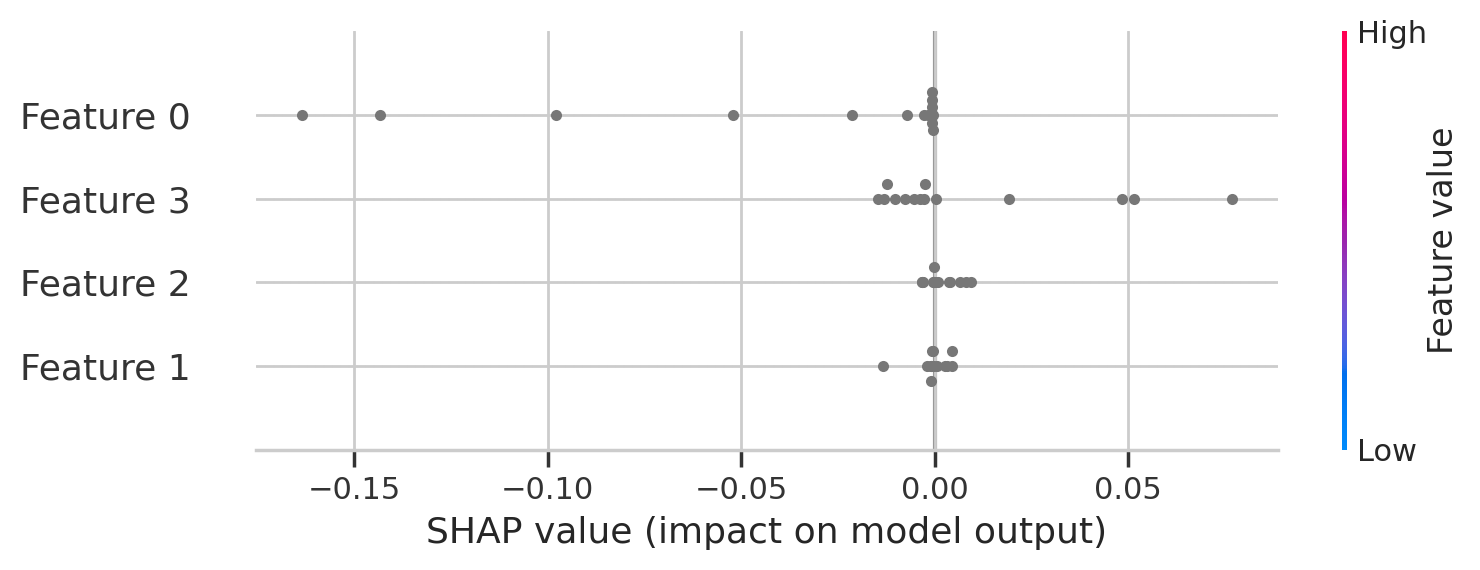

In [38]:
import matplotlib.pyplot as plt
#print(shap_values[0].shape, X_test[0].shape)

shap.summary_plot(shap_values[0], X_test[0], show= False)
print(X_test[0])
print(shap_values[0])
print('#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure')

tensor([[0.7173, 0.0215, 1.0000, 0.9852],
        [0.7766, 0.0000, 0.7879, 0.9828],
        [0.7766, 0.1057, 0.4518, 0.9824],
        [0.7943, 0.1455, 0.1984, 0.9834],
        [0.8298, 0.2545, 0.0000, 0.9811],
        [0.8605, 0.1626, 0.2554, 0.9789],
        [0.8511, 0.2113, 0.0397, 0.9797],
        [0.9173, 0.2650, 0.2220, 0.9809],
        [0.9787, 0.1227, 0.3583, 0.9796],
        [0.9574, 0.0816, 0.4260, 0.9772],
        [1.0000, 0.1249, 0.2329, 0.9749],
        [0.9894, 0.2769, 0.3110, 0.9762],
        [0.9319, 0.2965, 0.4185, 0.9780],
        [0.9309, 0.1249, 0.4783, 0.9785]], device='cuda:3')
[[-3.91916721e-04 -5.39279601e-04 -1.56712136e-04  3.03860637e-04]
 [-3.78574332e-04 -4.75869951e-04 -2.32081409e-04 -2.67878454e-03]
 [-5.66978066e-04 -7.78489979e-04 -8.38444757e-05 -3.79399140e-03]
 [-5.67266543e-04 -5.13347564e-04  8.07174365e-05 -5.40548004e-03]
 [-7.03620957e-04 -8.15612904e-04 -5.44898154e-04 -7.61941681e-03]
 [-7.48117687e-04 -9.82049503e-04  3.69678647e-03 -1.028976

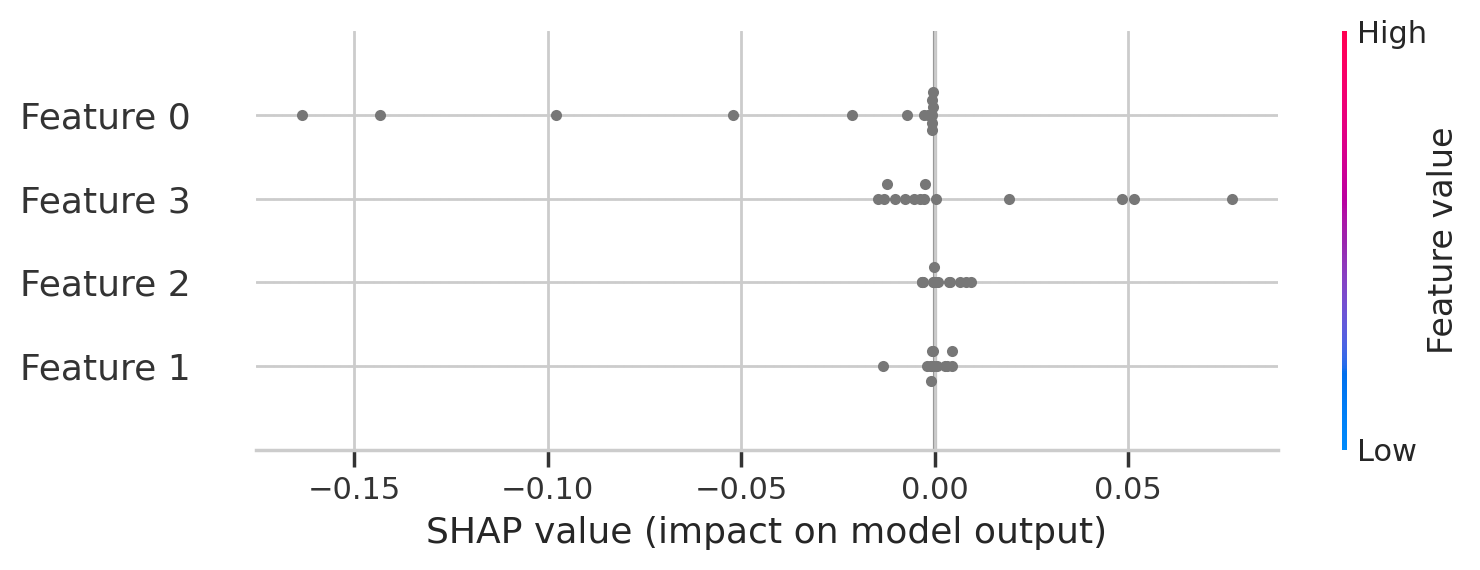

In [39]:
import matplotlib.pyplot as plt
#print(shap_values[0].shape, X_test[0].shape)
shap.summary_plot(shap_values[0], X_test[99], show= False)
print(X_test[99])
print(shap_values[0])

In [40]:
print('#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure')
shap.force_plot(explainer.expected_value[0], shap_values[0])

#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure


In [41]:
print('#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure')
shap.force_plot(explainer.expected_value[0], shap_values[13])

#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure


In [26]:
print('#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure')
shap.force_plot(explainer.expected_value[0], shap_values[14])

In [28]:
print('#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure')
shap.force_plot(explainer.expected_value[0], shap_values[21])

In [29]:
print('#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure')
shap.force_plot(explainer.expected_value[0], shap_values[27])

In [42]:
########################## variance plots #####################
# Assuming `model` is your trained LSTM model in PyTorch
background = X_train[:800]  # or whatever subset you choose
#background= background.to(device)
print('background:', type(background),background.size())
print()
#loaded_model.train()
#var_model.train()
loaded_model.train()
#loaded_model.forward= loaded_model.evaluate_and_compute_variance
print(type(loaded_model))
print()

#如果问题持续存在，作为一种可能的解决方案，可以尝试不使用 CuDNN 优化的 RNN。这可以通过在模型初始化前设置 torch.backends.cudnn.enabled = False 来实现，但这可能会影响模型的性能。
#torch.backends.cudnn.enabled = False
#######################################      Kernel_Explainer  #############################################
#explainer= shap.KernelExplainer(model, x_train_std.to_numpy().astype(np.float32)) # x is DataFrame here
#######################################      Deep_Explainer    #############################################
#explainer= shap.DeepExplainer(loaded_model, background.to(device))
explainer= shap.DeepExplainer(new_var_model, background.to(device))
############################# SHAP which data ############################
#shap_values = explainer.shap_values(X_test)
shap_values = explainer.shap_values(X_test)
print('X_test:', X_test.shape)
#Val_variances_2d
print('############')
print('shap_values:', type(shap_values), shap_values.shape)
print('explainer.expected_value:', explainer.expected_value.shape, explainer.expected_value)

background: <class 'torch.Tensor'> torch.Size([800, 14, 4])

<class '__main__.TimeSeriesLSTM_add_Var'>

len(tensors_list); 100
stacked_tensors: torch.Size([100, 800, 1])
variances.shape: torch.Size([800, 1])
len(tensors_list); 100
stacked_tensors: torch.Size([100, 1600, 1])
variances.shape: torch.Size([1600, 1])
len(tensors_list); 100
stacked_tensors: torch.Size([100, 1600, 1])
variances.shape: torch.Size([1600, 1])
len(tensors_list); 100
stacked_tensors: torch.Size([100, 1600, 1])
variances.shape: torch.Size([1600, 1])
len(tensors_list); 100
stacked_tensors: torch.Size([100, 1600, 1])
variances.shape: torch.Size([1600, 1])
len(tensors_list); 100
stacked_tensors: torch.Size([100, 1600, 1])
variances.shape: torch.Size([1600, 1])
len(tensors_list); 100
stacked_tensors: torch.Size([100, 1600, 1])
variances.shape: torch.Size([1600, 1])
len(tensors_list); 100
stacked_tensors: torch.Size([100, 1600, 1])
variances.shape: torch.Size([1600, 1])
len(tensors_list); 100
stacked_tensors: torch.Size

tensor([[0.2091, 0.8724, 0.0756, 0.0000],
        [0.3191, 0.7617, 0.0841, 0.9953],
        [0.2600, 0.8214, 0.1467, 0.9954],
        [0.3277, 0.6698, 0.1761, 0.9926],
        [0.3144, 0.7325, 0.1067, 0.9912],
        [0.3540, 0.7885, 0.4069, 0.9885],
        [0.1578, 1.0000, 0.4828, 0.9881],
        [0.1993, 0.8424, 0.0314, 0.9925],
        [0.1520, 0.8076, 0.2876, 0.9929],
        [0.0473, 0.6941, 0.4448, 0.9939],
        [0.0000, 0.6962, 0.4677, 0.9937],
        [0.0336, 0.7278, 0.2922, 0.9933],
        [0.0951, 0.6315, 0.2816, 0.9945],
        [0.0936, 0.7240, 0.2169, 0.9959]], device='cuda:3')
[[-2.56161962e-04  5.39300527e-05 -2.16549652e-05 -1.57397499e-05]
 [-3.36857163e-04  6.02913824e-05 -3.19784813e-05  1.46669801e-04]
 [-5.30206657e-04  1.00986545e-04 -2.88708598e-05  1.94059598e-04]
 [-7.09003420e-04  8.39981149e-05 -2.88160263e-05  2.41604110e-04]
 [-1.02595310e-03  1.39936325e-04 -7.37833034e-05  2.87875533e-04]
 [-1.37887429e-03  2.13022926e-04  9.32340263e-05  3.044777

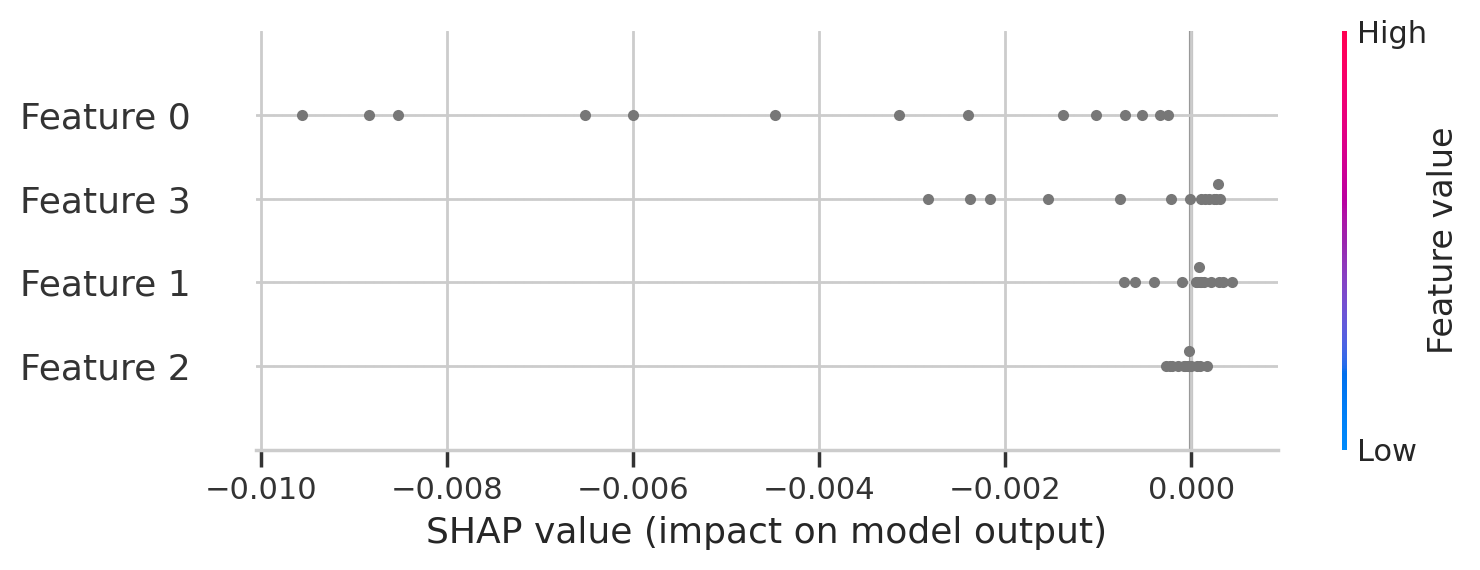

In [43]:
import matplotlib.pyplot as plt
#print(shap_values[0].shape, X_test[0].shape)
shap.summary_plot(shap_values[0], X_test[0], show= False)
print(X_test[0])
print(shap_values[0])
print('#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure')

In [44]:
print('#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure')
shap.force_plot(explainer.expected_value[0], shap_values[0])

#feature 0 is mean_temp, #feature 1 humidity, #feature 2 windspeed, #feature 3 mean_pressure


In [46]:
shap.force_plot(explainer.expected_value[0], shap_values[18])

In [45]:
shap.force_plot(explainer.expected_value[0], shap_values[24])

In [29]:
shap.force_plot(explainer.expected_value[0], shap_values[27])

In [30]:
shap.force_plot(explainer.expected_value[0], shap_values[28])

In [31]:
shap.force_plot(explainer.expected_value[0], shap_values[29])

In [32]:
print(shap_values.shape, type(shap_values), X_test.shape, type(X_test.cpu().to(dtype=torch.float)))
shap.dependence_plot("Feature 0", shap_values, X_test.cpu().numpy())

(100, 14, 4) <class 'numpy.ndarray'> torch.Size([100, 14, 4]) <class 'torch.Tensor'>


ValueError: m has more than 2 dimensions

In [17]:
#print(shap_values, type(shap_values), len(shap_values))
# shap_values_np= np.array(shap_values)
# print(shap_values_np.shape)

#print(shap_values.sum()/67/14/7)
print(shap_values.sum())
#so called basci value of whole test data, the average prediction value of whole testsets
print('###################')
print(shap_values[0, 0, :])
print(shap_values[0, 1, :])
print()
print(shap_values[0].shape, X_test[0].shape, y_test[0].shape, y_test[0])

print()
print(shap_values[0, 0, :].shape)

29.284735533403637
###################
[ 1.47675208e-04 -1.23446880e-04 -1.33602894e-04  1.03975239e-03
 -3.05140165e-05  2.98770010e-06  7.35835929e-05]
[ 2.69886776e-04 -1.59095624e-04 -2.46920012e-04  1.79750018e-03
 -6.64065592e-05  3.70440057e-06  1.11312176e-04]

(14, 7) torch.Size([14, 7]) torch.Size([]) tensor(0.6932)

(7,)


In [18]:
torch.save(model.state_dict(), 'LSTM_covidprection_state_dict_otherfeature.pth')
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")    

In [21]:
#套用模型，预测输出
loaded_model = TimeSeriesLSTM(input_dim=7, hidden_dim=50, num_layers=2, dropout_prob=0.3).to(device)
model_weight_path = os.path.abspath(os.path.join(os.getcwd(),"/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/LSTM_covidprection_state_dict_new.pth"))
loaded_model.load_state_dict(torch.load(model_weight_path))

<All keys matched successfully>

In [22]:
print(loaded_model)

TimeSeriesLSTM(
  (lstm): LSTM(7, 50, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [23]:
##################################### Validation #############################
print(X_val.size(), Y_val.size())
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
X_val = X_val.to(device)
Y_val = Y_val.to(device)
loaded_model = loaded_model.to(device)
print()

loaded_model.train()
#loaded_model.eval()
tensors_list= []
for i in range(100):
    
    outputs = loaded_model(X_val)
    print(outputs.size())
    print(outputs.squeeze().size())
    loss = criterion(outputs.squeeze(), Y_val)
    print(f"Loss at iteration {i}: {loss.item()}")
    print()
    tensors_list.append(outputs)

# Stack the tensors to create a 3D tensor of size (100, 131, 1)
stacked_tensors = torch.stack(tensors_list, dim=0)

# Compute the variance along the first dimension
variances = torch.var(stacked_tensors, dim=0, unbiased=False)

variances_2d = variances.reshape(131, 1)
print('variances_2d:', variances_2d.size())

torch.Size([131, 14, 7]) torch.Size([131])

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 0: 0.2157505750656128

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 1: 0.2178696244955063

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 2: 0.22545039653778076

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 3: 0.2204924374818802

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 4: 0.2158927023410797

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 5: 0.22467245161533356

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 6: 0.21992509067058563

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 7: 0.22508057951927185

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 8: 0.22758063673973083

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 9: 0.2191847562789917

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 10: 0.22072958946228027

torch.Size([131, 1])
torch.Size([131])
Loss at iteration 11: 0.215586

In [24]:
################################################### Test #######################################
print(X_test.size(), Y_test.size())
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
X_test = X_test.to(device)
Y_test = Y_test.to(device)
loaded_model = loaded_model.to(device)
print()

loaded_model.train()
#loaded_model.eval()
for i in range(100):

    outputs = loaded_model(X_test)
    print(outputs.size())
    print(outputs.squeeze().size())
    loss = criterion(outputs.squeeze(), Y_test)
    print(f"Loss at iteration {i}: {loss.item()}")
    print()

torch.Size([67, 14, 7]) torch.Size([67])

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 0: 0.5101853609085083

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 1: 0.5065192580223083

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 2: 0.5153505802154541

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 3: 0.5257284641265869

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 4: 0.5131925940513611

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 5: 0.5119898319244385

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 6: 0.5075415372848511

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 7: 0.509232759475708

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 8: 0.5117907524108887

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 9: 0.5282428860664368

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 10: 0.5149022340774536

torch.Size([67, 1])
torch.Size([67])
Loss at iteration 11: 0.5356879234313965

torch.Size([67, 1])
t

(14, 7) torch.Size([14, 7])
tensor([[0.2168, 0.7840, 0.4764, 0.8531, 0.1686, 0.0125, 0.6752],
        [0.2325, 0.7515, 0.4536, 0.8460, 0.1628, 0.0080, 0.6752],
        [0.2104, 0.8831, 0.5307, 0.8527, 0.1547, 0.0097, 0.6752],
        [0.2404, 0.7725, 0.5263, 0.8280, 0.1699, 0.0175, 0.6752],
        [0.1621, 0.7684, 0.4736, 0.6112, 0.3479, 0.1830, 0.6752],
        [0.1636, 0.7257, 0.4916, 0.4965, 0.1389, 0.0160, 0.6752],
        [0.2564, 0.7015, 0.5293, 0.7394, 0.1312, 0.0148, 0.6752],
        [0.2714, 0.7567, 0.5887, 0.6599, 0.1647, 0.0226, 0.6752],
        [0.2832, 0.5963, 0.6853, 0.6700, 0.1395, 0.0123, 0.6752],
        [0.2446, 0.5908, 0.5771, 0.6680, 0.1777, 0.0145, 0.6752],
        [0.2796, 0.6671, 0.4464, 0.6721, 0.1843, 0.0148, 0.6752],
        [0.1754, 0.7090, 0.4357, 0.4887, 0.2747, 0.1777, 0.6752],
        [0.1682, 0.6579, 0.4259, 0.4053, 0.1094, 0.0100, 0.6752],
        [0.3196, 0.6966, 0.4361, 0.6745, 0.1431, 0.0088, 0.6752]])


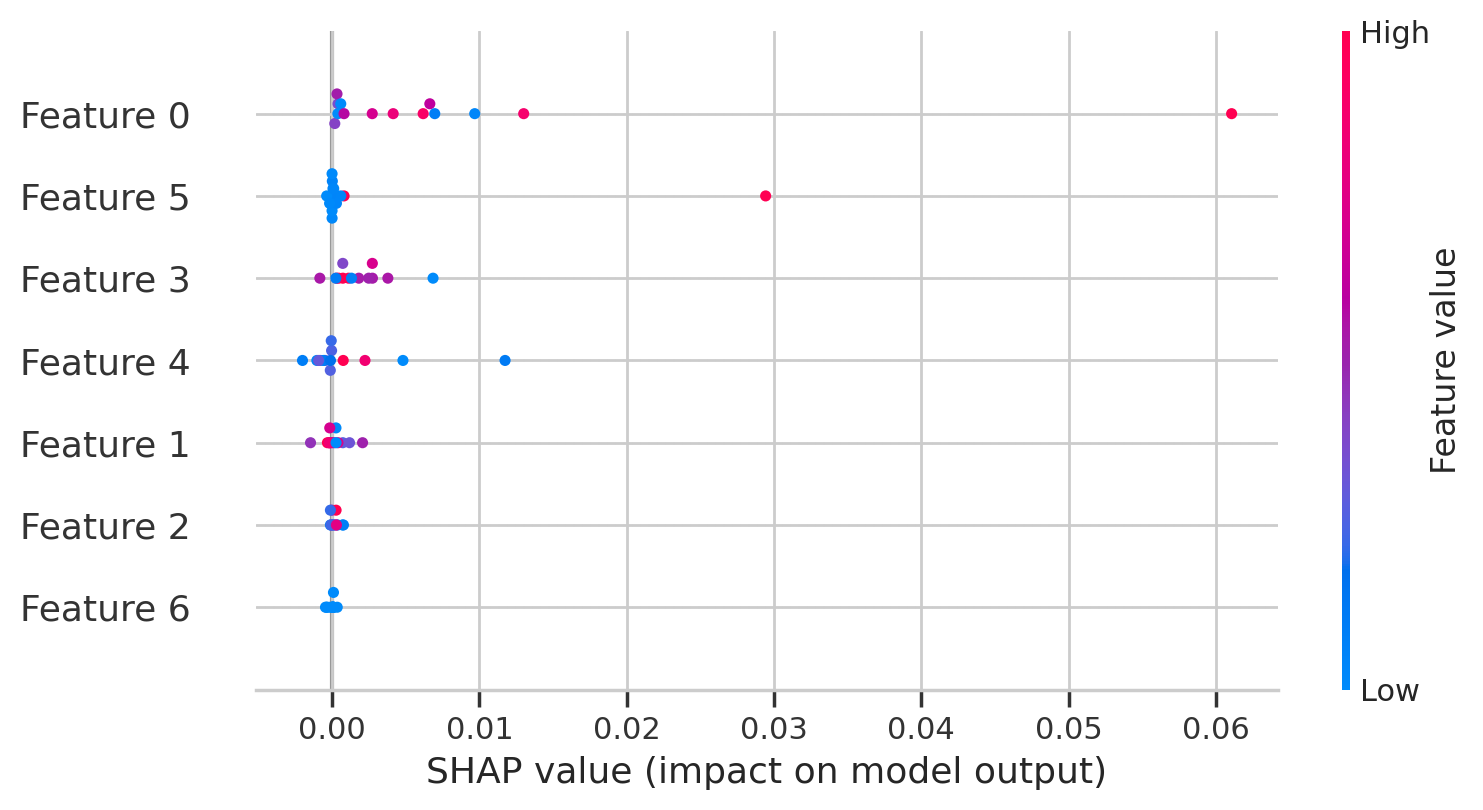

In [69]:
import matplotlib.pyplot as plt
print(shap_values[0].shape, X_test[0].shape)
shap.summary_plot(shap_values[0], X_test[0], show= False)
print(X_test[0])

In [70]:
print('###############')
print(torch.sum(X_test[0], dim= 1, keepdim= True))

###############
tensor([[3.1865],
        [3.1296],
        [3.3165],
        [3.2296],
        [3.2214],
        [2.7075],
        [3.0479],
        [3.1392],
        [3.0618],
        [2.9479],
        [2.9395],
        [2.9363],
        [2.4518],
        [2.9539]])


(14, 7) torch.Size([14, 7])
tensor([[0.2325, 0.7515, 0.4536, 0.8460, 0.1628, 0.0080, 0.6752],
        [0.2104, 0.8831, 0.5307, 0.8527, 0.1547, 0.0097, 0.6752],
        [0.2404, 0.7725, 0.5263, 0.8280, 0.1699, 0.0175, 0.6752],
        [0.1621, 0.7684, 0.4736, 0.6112, 0.3479, 0.1830, 0.6752],
        [0.1636, 0.7257, 0.4916, 0.4965, 0.1389, 0.0160, 0.6752],
        [0.2564, 0.7015, 0.5293, 0.7394, 0.1312, 0.0148, 0.6752],
        [0.2714, 0.7567, 0.5887, 0.6599, 0.1647, 0.0226, 0.6752],
        [0.2832, 0.5963, 0.6853, 0.6700, 0.1395, 0.0123, 0.6752],
        [0.2446, 0.5908, 0.5771, 0.6680, 0.1777, 0.0145, 0.6752],
        [0.2796, 0.6671, 0.4464, 0.6721, 0.1843, 0.0148, 0.6752],
        [0.1754, 0.7090, 0.4357, 0.4887, 0.2747, 0.1777, 0.6752],
        [0.1682, 0.6579, 0.4259, 0.4053, 0.1094, 0.0100, 0.6752],
        [0.3196, 0.6966, 0.4361, 0.6745, 0.1431, 0.0088, 0.6752],
        [0.3161, 0.7790, 0.5199, 0.6932, 0.1623, 0.0161, 0.6752]])


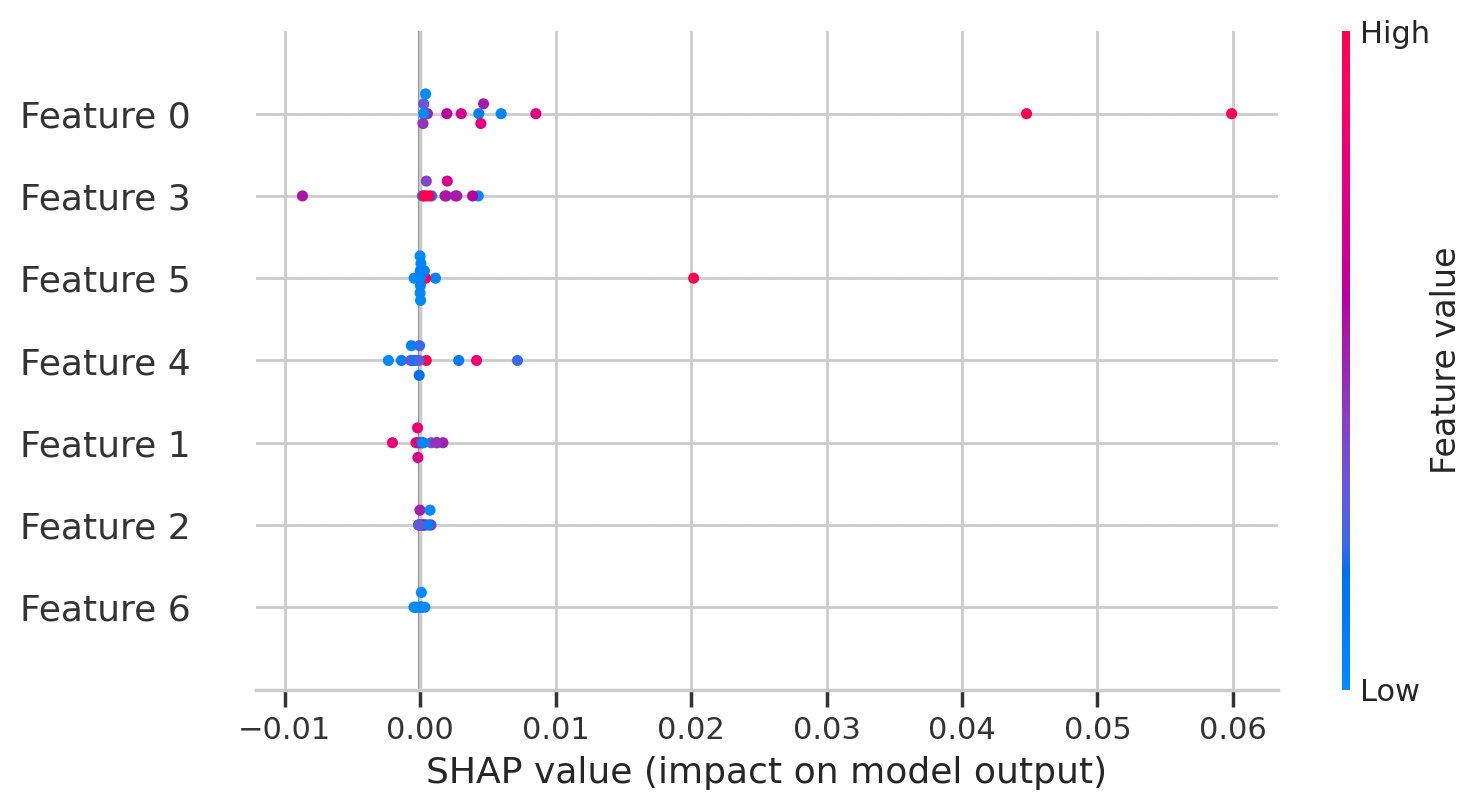

In [71]:
import matplotlib.pyplot as plt
print(shap_values[1].shape, X_test[1].shape)
shap.summary_plot(shap_values[1], X_test[1], show= False)
print(X_test[1])

In [72]:
print('###############')
print(torch.sum(X_test[1], dim= 1, keepdim= True))

###############
tensor([[3.1296],
        [3.3165],
        [3.2296],
        [3.2214],
        [2.7075],
        [3.0479],
        [3.1392],
        [3.0618],
        [2.9479],
        [2.9395],
        [2.9363],
        [2.4518],
        [2.9539],
        [3.1618]])


In [23]:
shap.dependence_plot("Feature 0", shap_values, X_test[0])

AttributeError: 'Tensor' object has no attribute 'astype'

In [15]:
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [16]:
shap.plots.heatmap(shap_values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Use Explainer to turn data from 3D to 2D

In [45]:
#######################################      Explainer    #############################################
import torch
print('train, valida, test of X:', X_train.shape, X_val.shape, X_test.shape)
print('train, valida, test of Y:', Y_train.shape, Y_val.shape, Y_test.shape)
# 假设data是原始三维时间序列数据: [日期数, 时间步数, 特征数]
# data = ...

# 展平时间步和特征维度
# 新的维度将是 [日期数, 时间步数 * 特征数]
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
# 用展平后的数据创建Tensor
X_train_flattened_tensor = torch.tensor(X_train_flattened, dtype=torch.float32)
print(X_train_flattened_tensor.shape)

X_val_flattened = X_val.reshape(X_val.shape[0], -1)
# 用展平后的数据创建Tensor
X_val_flattened_tensor = torch.tensor(X_val_flattened, dtype=torch.float32)
print(X_val_flattened_tensor.shape)

# 为LSTM创建输入
# 这里，序列长度将是展平后的时间步与特征的乘积
lstm = torch.nn.LSTM(input_size= X_train_flattened.shape[1], hidden_size= 50, batch_first=True)
# 进行训练（示例）
# 假设您已经设置了训练循环和必要的参数
outputs, (hn, cn) = lstm(X_train_flattened_tensor.unsqueeze(0))

train, valida, test of X: torch.Size([459, 14, 7]) torch.Size([131, 14, 7]) torch.Size([67, 14, 7])
train, valida, test of Y: torch.Size([459]) torch.Size([131]) torch.Size([67])
torch.Size([459, 98])
torch.Size([131, 98])


To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [50]:
class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(TimeSeriesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, 1)  # Predicting one value (column "A")

    def forward(self, x):
        out, _ = self.lstm(x)
        #out = self.batch_norm(out[:, -1, :])
        out = self.batch_norm(out)
        out = self.dropout(out)
        #out = self.dropout(out[:, -1, :])  # Take the last time step
        out = self.fc(out)
        return out

model = TimeSeriesLSTM(input_dim=98, hidden_dim=50, num_layers=2, dropout_prob=0.0)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch [10/200], Training Loss: 0.0270, Validation Loss: 0.0215
Epoch [20/200], Training Loss: 0.0104, Validation Loss: 0.0179
Epoch [30/200], Training Loss: 0.0052, Validation Loss: 0.0138
Epoch [40/200], Training Loss: 0.0034, Validation Loss: 0.0126
Epoch [50/200], Training Loss: 0.0029, Validation Loss: 0.0112
Epoch [60/200], Training Loss: 0.0025, Validation Loss: 0.0089
Epoch [70/200], Training Loss: 0.0022, Validation Loss: 0.0074
Epoch [80/200], Training Loss: 0.0020, Validation Loss: 0.0071
Epoch [90/200], Training Loss: 0.0019, Validation Loss: 0.0057
Epoch [100/200], Training Loss: 0.0017, Validation Loss: 0.0036
Epoch [110/200], Training Loss: 0.0016, Validation Loss: 0.0029
Epoch [120/200], Training Loss: 0.0015, Validation Loss: 0.0026
Epoch [130/200], Training Loss: 0.0014, Validation Loss: 0.0025
Epoch [140/200], Training Loss: 0.0013, Validation Loss: 0.0024
Epoch [150/200], Training Loss: 0.0012, Validation Loss: 0.0023
Epoch [160/200], Training Loss: 0.0011, Validatio

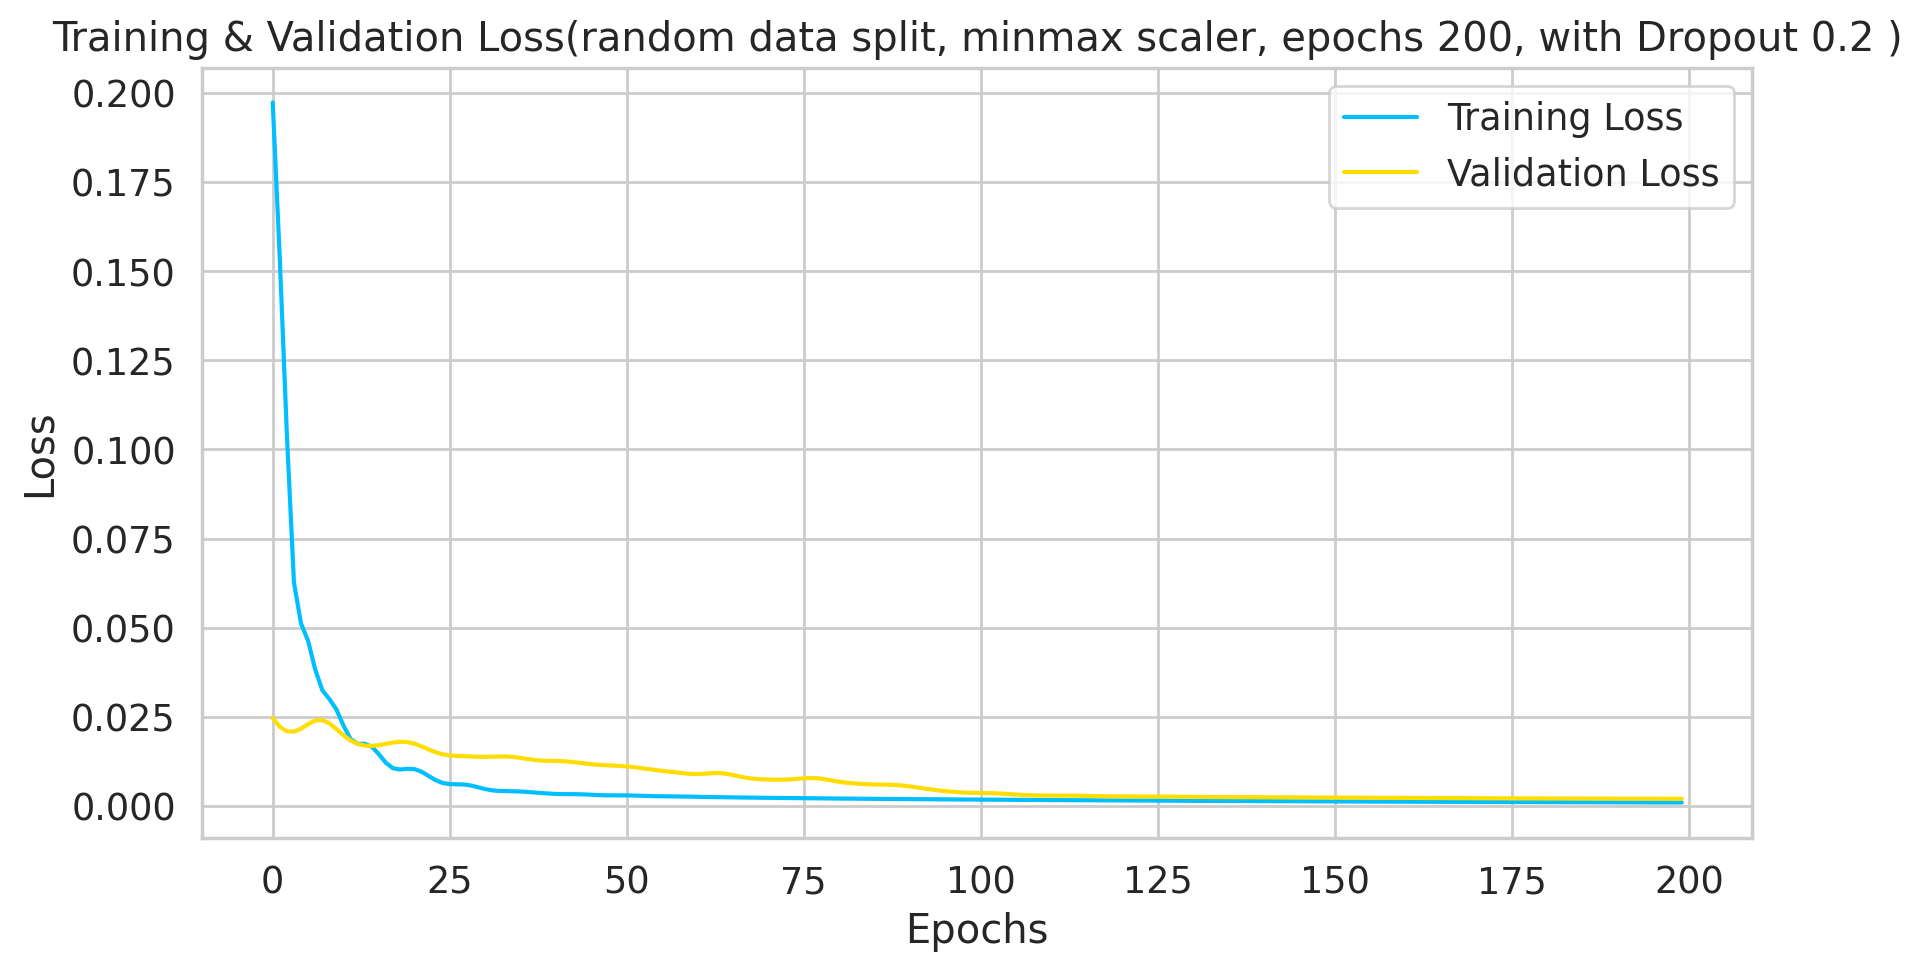

In [51]:
############################ random data split, minmax scaler, epochs 200, with Dropout 0.2 #######################
epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train_flattened_tensor )
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_flattened_tensor )
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss(random data split, minmax scaler, epochs 200, with Dropout 0.2 )')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

explainer = shap.Explainer(model, X_train)
print(X_train.shape)
print(X_train[:459].shape)

shap_values = explainer(X_train)

In [20]:
#explainer = shap.GradientExplainer(model, background)
#shap_values, _ = explainer.shap_values(X_test, nsamples=100)

# Plotting for a specific instance
# shap.initjs()
# shap.force_plot(explainer.expected_value[0].detach().numpy(), shap_values[0][0], X_test[0].detach().numpy())
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=['feature1', 'feature2', ...])

AttributeError: 'Permutation' object has no attribute 'expected_value'

In [15]:
################## save the model#####################
torch.save(model, '/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/uncertainty_LSTM.pth')

loaded_model= torch.load('/home/fe/twang/MA_copy/Uncertainty/SHAP_everything/codes/uncertainty_LSTM.pth')

In [16]:

######################### SHAP ##########################
import shap

# Assuming `model` is your trained LSTM model
explainer = shap.DeepExplainer(model, X_train[:100]) # Use a subset of the training data as background
shap_values = explainer.shap_values(X_test)

/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/fe/twang/.local/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

In [20]:
# Plotting the SHAP values for the first instance in the test set
shap.initjs()
#shap.force_plot(explainer.expected_value[0].detach().numpy(), shap_values[0][0], X_test[0].detach().numpy())
shap.force_plot(explainer.expected_value[0].detach().numpy(), shap_values[0][0], X_test[0].detach().numpy())


AttributeError: 'numpy.float32' object has no attribute 'detach'

In [ ]:
# Summing SHAP values over all time steps
shap_aggregated = shap_values[0].sum(axis=1)

# Plot summary
shap.summary_plot(shap_aggregated, X_test.detach().numpy().sum(axis=1))


Epoch [10/70], Training Loss: 0.0207, Validation Loss: 0.0103
Epoch [20/70], Training Loss: 0.0191, Validation Loss: 0.0057
Epoch [30/70], Training Loss: 0.0176, Validation Loss: 0.0047
Epoch [40/70], Training Loss: 0.0145, Validation Loss: 0.0050
Epoch [50/70], Training Loss: 0.0088, Validation Loss: 0.0024
Epoch [60/70], Training Loss: 0.0076, Validation Loss: 0.0053
Epoch [70/70], Training Loss: 0.0058, Validation Loss: 0.0023


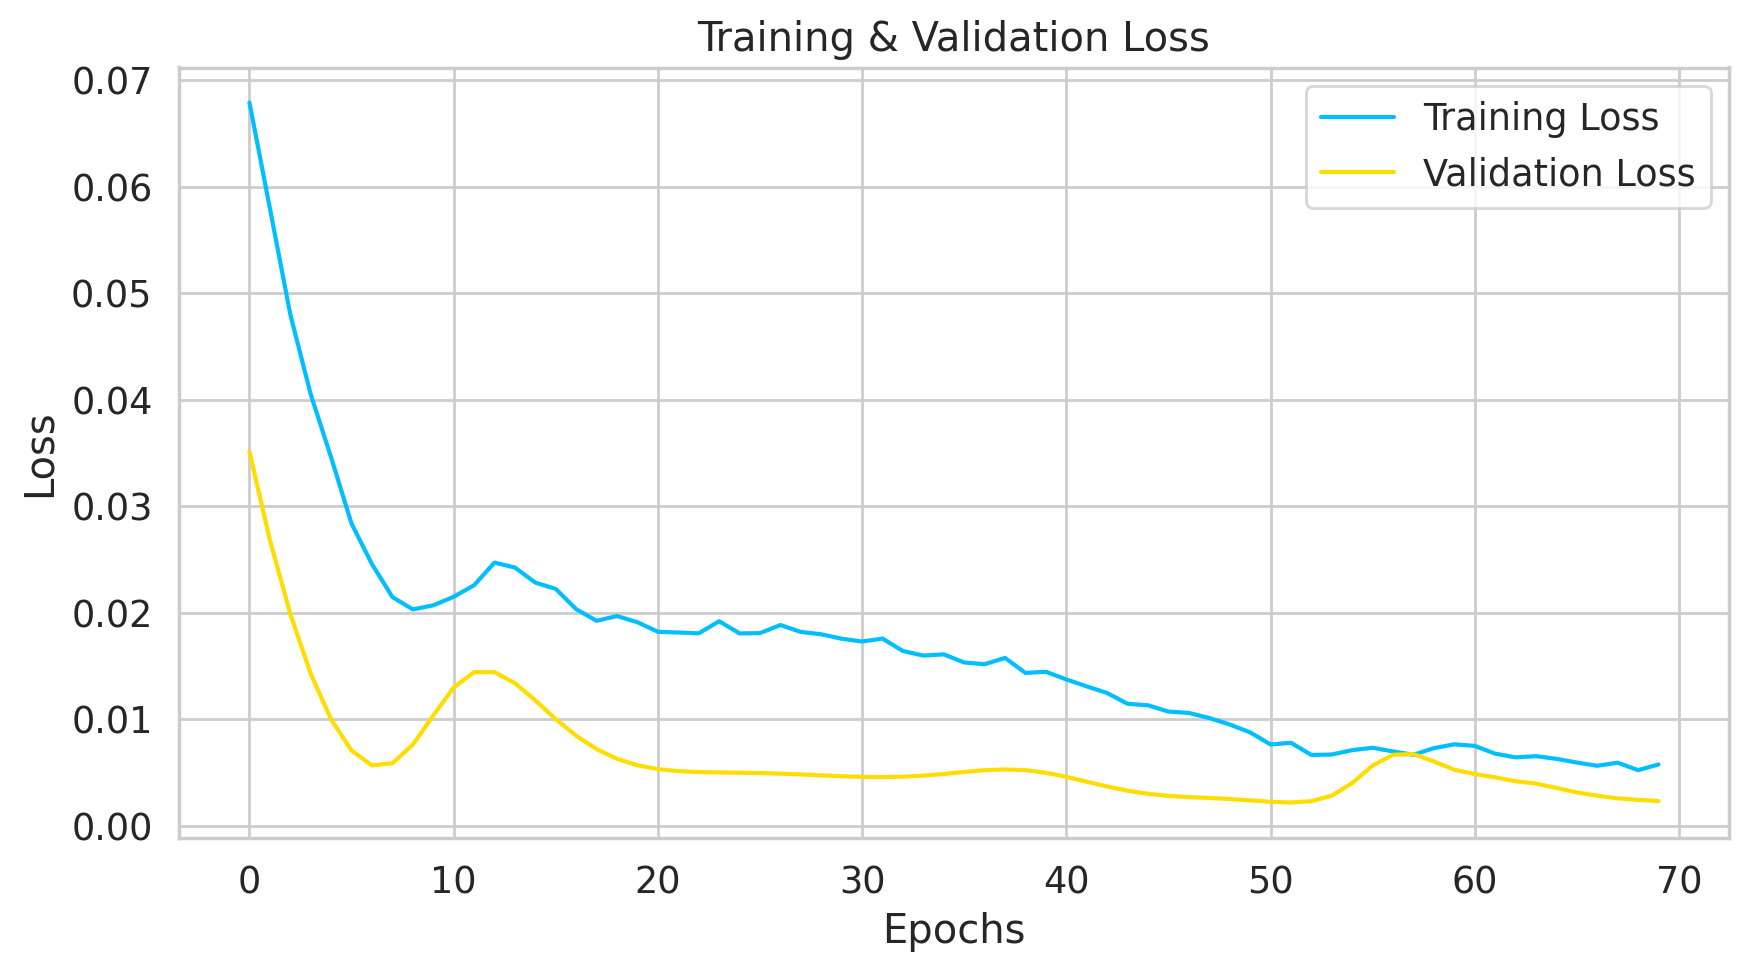

In [26]:
############################ minmax scaler, epochs 70#######################
epochs = 70
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/70], Training Loss: 0.3622, Validation Loss: 0.1003
Epoch [20/70], Training Loss: 0.1745, Validation Loss: 0.0667
Epoch [30/70], Training Loss: 0.1393, Validation Loss: 0.0532
Epoch [40/70], Training Loss: 0.1017, Validation Loss: 0.0782
Epoch [50/70], Training Loss: 0.0889, Validation Loss: 0.0829
Epoch [60/70], Training Loss: 0.0782, Validation Loss: 0.0757
Epoch [70/70], Training Loss: 0.0682, Validation Loss: 0.0860


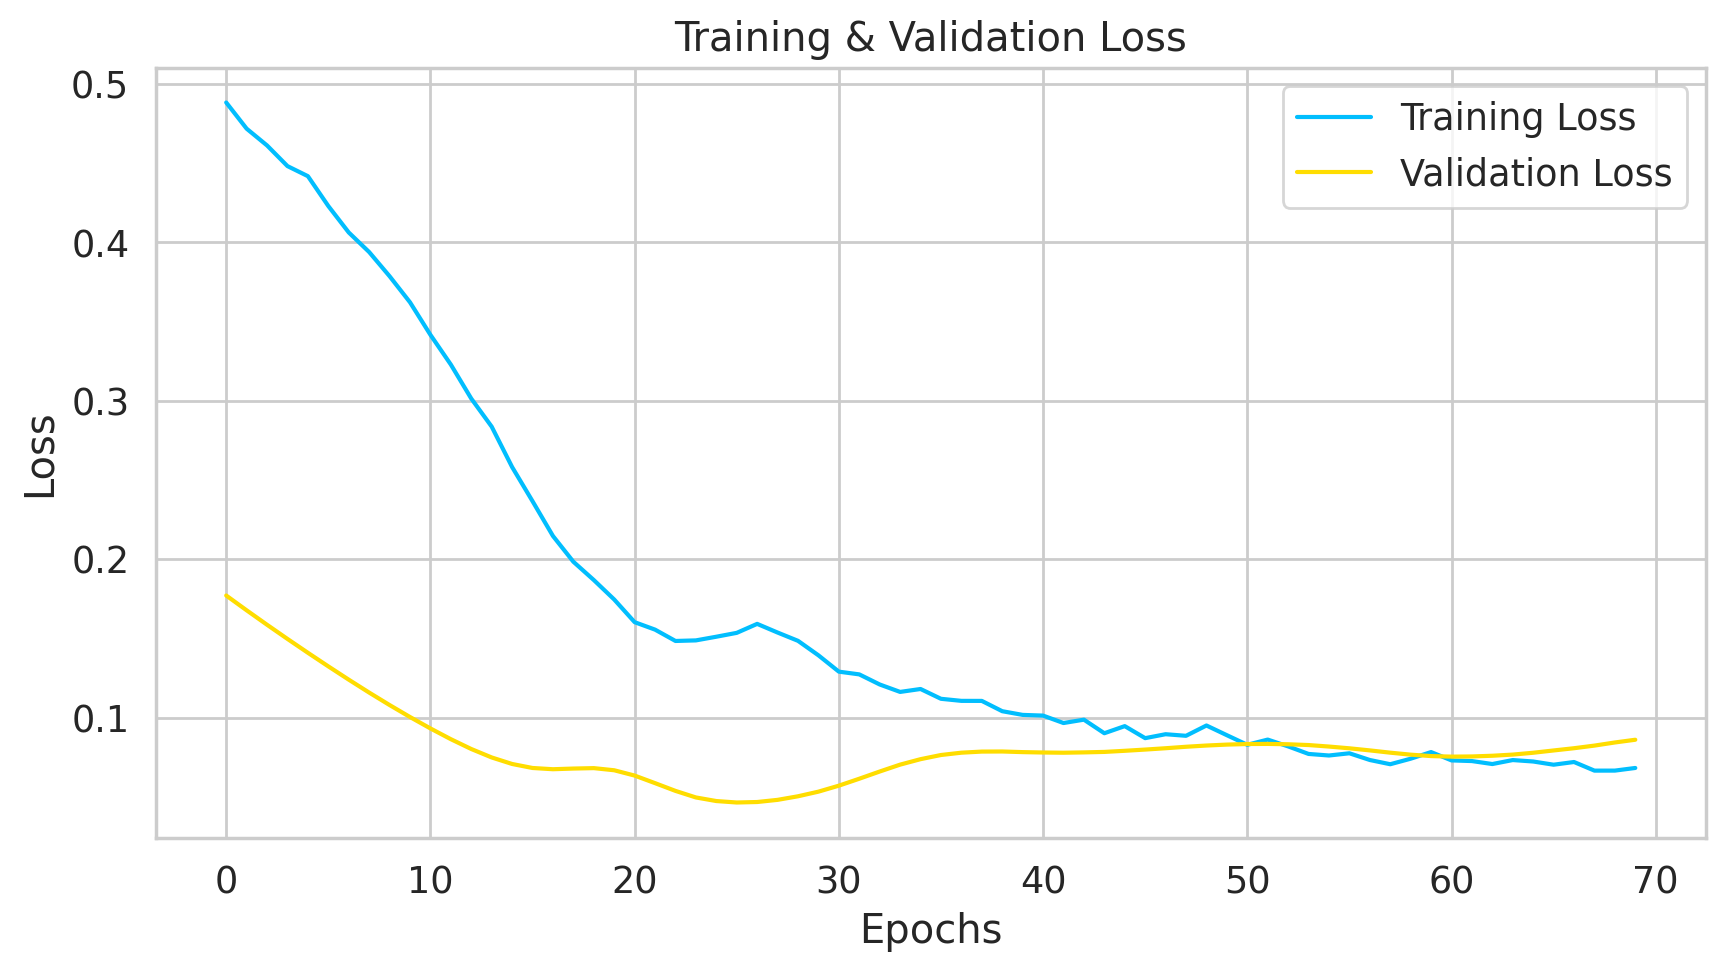

In [17]:
############################ standard scaler, epochs 70#######################
epochs = 70
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/100], Training Loss: 0.3622, Validation Loss: 0.1003
Epoch [20/100], Training Loss: 0.1745, Validation Loss: 0.0667
Epoch [30/100], Training Loss: 0.1393, Validation Loss: 0.0532
Epoch [40/100], Training Loss: 0.1017, Validation Loss: 0.0782
Epoch [50/100], Training Loss: 0.0889, Validation Loss: 0.0829
Epoch [60/100], Training Loss: 0.0782, Validation Loss: 0.0757
Epoch [70/100], Training Loss: 0.0682, Validation Loss: 0.0860
Epoch [80/100], Training Loss: 0.0665, Validation Loss: 0.1072
Epoch [90/100], Training Loss: 0.0674, Validation Loss: 0.1148
Epoch [100/100], Training Loss: 0.0643, Validation Loss: 0.1164


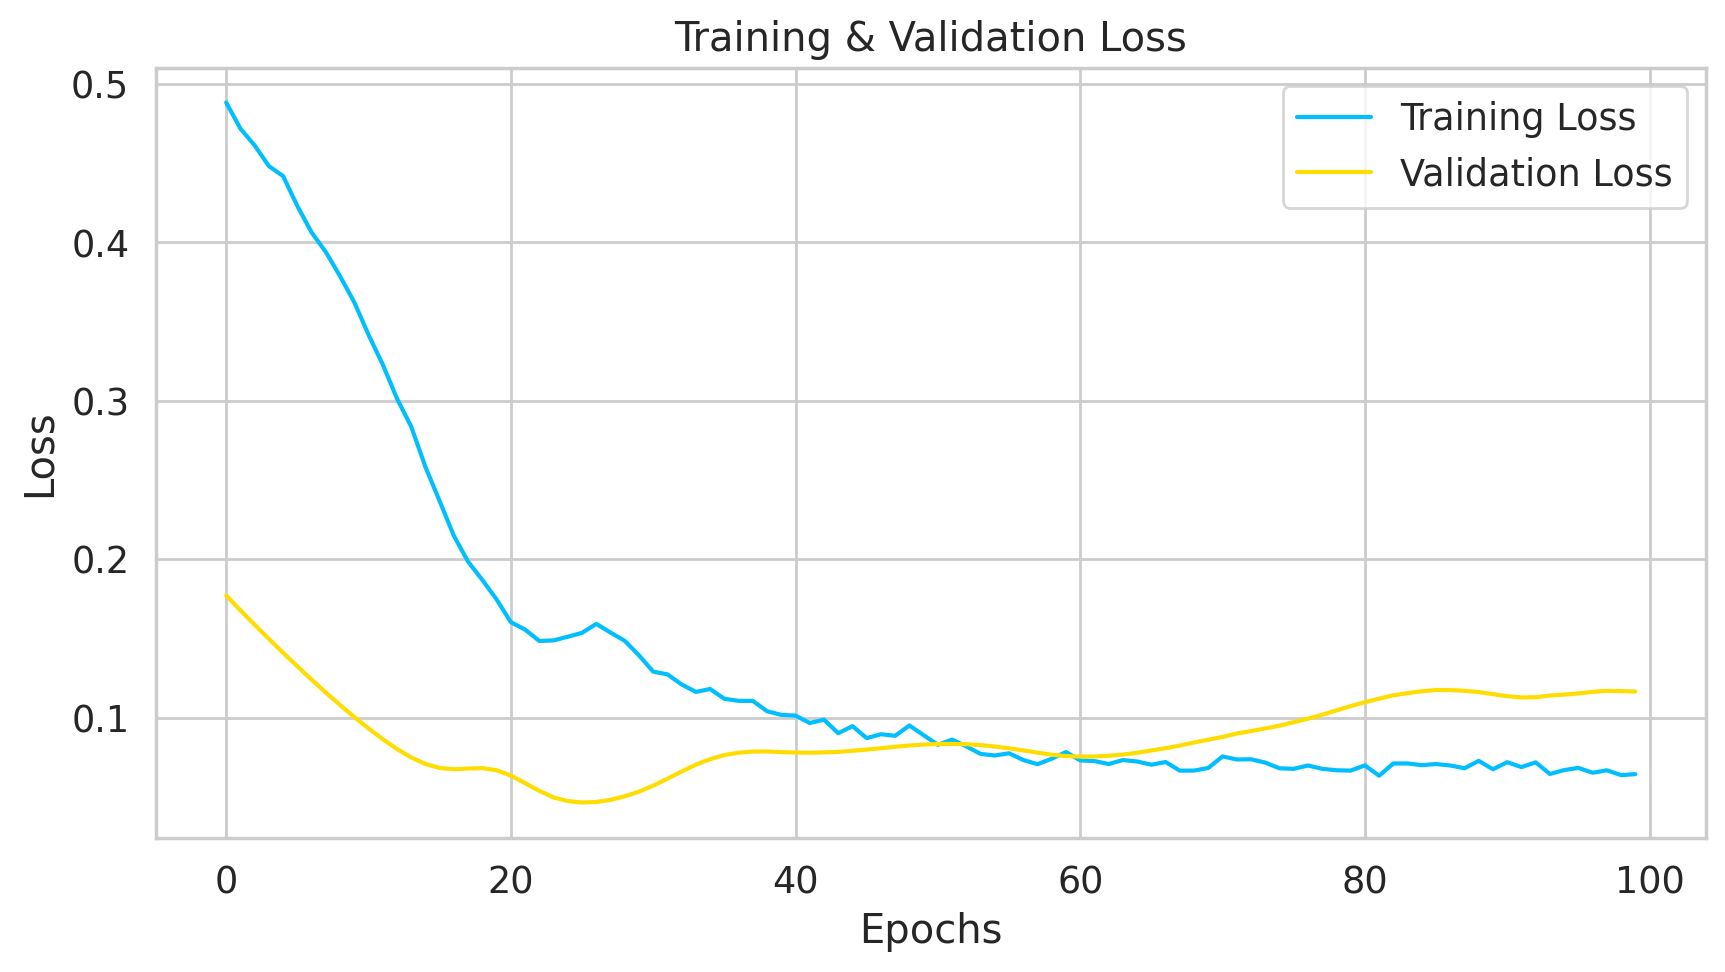

In [8]:
############################ minmax scaler, epochs 70#######################
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch [10/1000], Training Loss: 0.3622, Validation Loss: 0.1003
Epoch [20/1000], Training Loss: 0.1745, Validation Loss: 0.0667
Epoch [30/1000], Training Loss: 0.1393, Validation Loss: 0.0532
Epoch [40/1000], Training Loss: 0.1017, Validation Loss: 0.0782
Epoch [50/1000], Training Loss: 0.0889, Validation Loss: 0.0829
Epoch [60/1000], Training Loss: 0.0782, Validation Loss: 0.0757
Epoch [70/1000], Training Loss: 0.0682, Validation Loss: 0.0860
Epoch [80/1000], Training Loss: 0.0665, Validation Loss: 0.1072
Epoch [90/1000], Training Loss: 0.0674, Validation Loss: 0.1148
Epoch [100/1000], Training Loss: 0.0643, Validation Loss: 0.1164
Epoch [110/1000], Training Loss: 0.0706, Validation Loss: 0.1183
Epoch [120/1000], Training Loss: 0.0647, Validation Loss: 0.1348
Epoch [130/1000], Training Loss: 0.0670, Validation Loss: 0.1396
Epoch [140/1000], Training Loss: 0.0635, Validation Loss: 0.1439
Epoch [150/1000], Training Loss: 0.0579, Validation Loss: 0.1576
Epoch [160/1000], Training Loss: 0

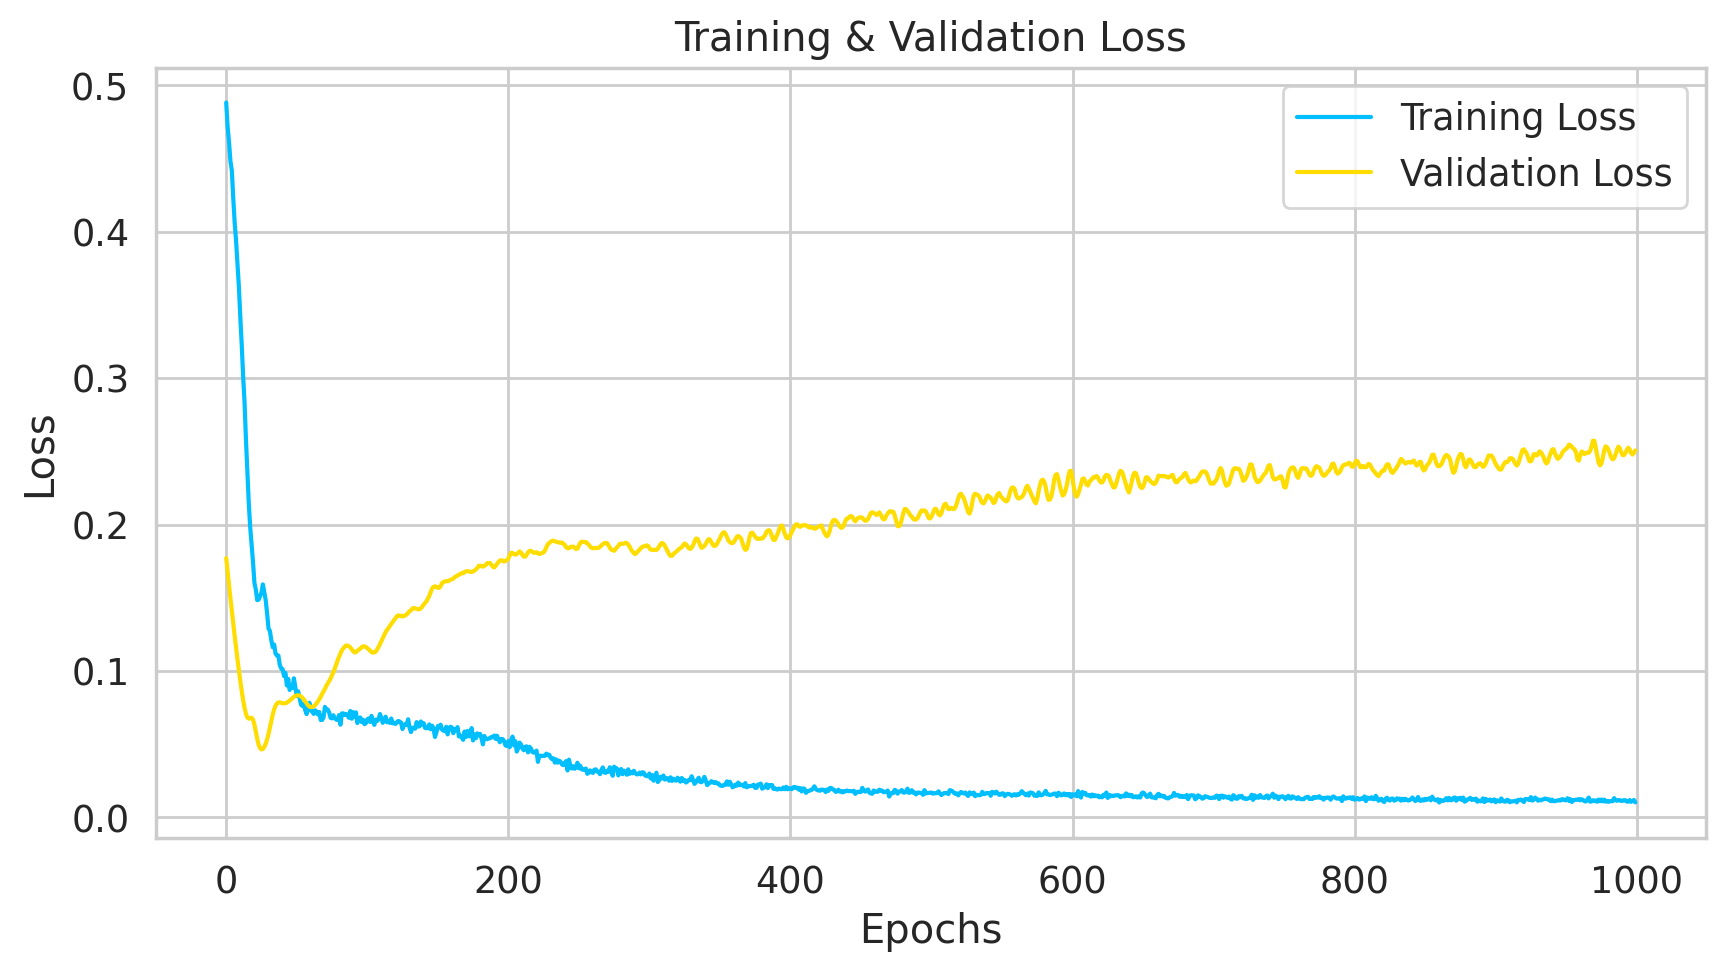

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.squeeze(), Y_val)
    
    # Store the losses for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


BARD

In [24]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get the last 14 days of data
        X = self.data[idx - 14:idx]

        # Standardize the data
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # Get the target variable
        y = self.data[idx]

        return X, y

In [11]:
# scaler = StandardScaler()
# #scaler = scaler.fit(np.expand_dims(df_new[:657], axis=1))
# scaler = scaler.fit(df_new[:657])
 
# train_data = scaler.transform(df_new[:657])
# test_data = scaler.transform(df_new[657:])

In [25]:
train_dataset = Dataset(df_new[:657])
test_dataset = Dataset(df_new[657:])
print(train_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

In [26]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(LSTMModel, self).__init__()

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.linear(x)

        return x


In [27]:
model = LSTMModel(input_size=7, hidden_size=128, num_layers= 3, dropout=0.3)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress
        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch + 1}, Batch: {batch_idx}, Loss: {loss.item():.4f}')


KeyError: 418

In [ ]:
with torch.no_grad():
    total_loss = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, target)

        # Update total loss
        total_loss += loss.item()

    # Compute average loss
    avg_loss = total_loss / len(test_loader)

    print(f'Test loss: {avg_loss:.4f}')
